<img src="https://upload.wikimedia.org/wikipedia/fr/8/81/Sciences_SU.png" width="240" height="240" align="center"/>


# MLA 703. RNN-LSTM et architectures avancées [Analyse de sentiment]

## Travail par Etudiants:
Wenxuan Hu, M2-ISI, 3970936

Zhuoxuan Cao, M2-ISI, 21306641

## 1. Partie du rapport

Ce rapport vise à analyser et comparer l'impact de différents modèles (RNN, LSTM, LSTM bidirectionnel (biLSTM) et LSTM multicouche) dans une tâche d'analyse des sentiments. Nous explorons divers types d'architectures de réseaux, ajustant leur structure et leurs paramètres afin de trouver la solution optimale. Ce travail s'appuie sur une analyse théorique de différentes architectures et des références de la littérature existante pour comparer les performances de plusieurs architectures, et valide les résultats expérimentaux.

Dans ce rapport, nous avons d'abord ajusté et configuré les hyperparamètres des modèles Simple RNN, Mono LSTM, biLSTM et LSTM multicouche, en menant des expériences sur des paramètres tels que `Batch Size` et `maxlen` pour évaluer leur impact sur les performances de l'ensemble d'entraînement et de validation. Notre objectif est de révéler l'influence de ces paramètres sur la vitesse d'entraînement, la convergence et la capacité de généralisation du modèle, afin de trouver la configuration optimale pour la tâche d'analyse des sentiments. Ce rapport détaille le processus de conception des expériences, la comparaison des performances des modèles, ainsi que la discussion des résultats, pour mieux comprendre le comportement des réseaux de neurones récurrents dans les tâches de traitement de texte, ainsi que leurs limites.

Toutes nos fonctions d'activation utilisent la fonction sigmoid afin d'assurer que la sortie du modèle soit une probabilité dans la plage de [0, 1].













### 1.1 RNN



Dans la section `2.1` du rapport, nous avons testé les performances du réseau RNN `[1]`.

Le réseau de neurones récurrents (Recurrent Neural Network, RNN) est une structure de réseau spécifiquement conçue pour traiter des données séquentielles. Contrairement aux réseaux de neurones classiques à propagation avant, le RNN dispose de connexions récurrentes, permettant de transmettre la sortie des étapes temporelles précédentes en tant qu'entrée aux étapes actuelles. Cette conception permet au RNN de capturer les dépendances temporelles, ce qui le rend particulièrement adapté aux tâches d'analyse de séries temporelles et de traitement du langage naturel. La caractéristique principale du RNN est sa capacité de "mémoire", en conservant la dépendance de l'état précédent grâce aux unités récurrentes.

Dans cette section, nous avons effectué plusieurs expériences sur le RNN et avons finalement déterminé un ensemble de paramètres optimaux :
- `num_words = 5000` : Taille du vocabulaire, en sélectionnant les 5000 mots les plus courants.
- `embed_size = 128` : Taille de la dimension de l'embedding, en représentant chaque mot par un vecteur de 128 dimensions.
- `Dropout = 0,25` : Abandon aléatoire de 25% des neurones pendant l'entraînement pour éviter le surapprentissage.
- `epochs = 20` : Nombre d'époques d'entraînement, pour un total de 20 itérations complètes.

- `Clipping des gradients` : Limite la valeur maximale des gradients, assurant une stabilité de l'entraînement du RNN sur de longues séquences.

- `Réduction du taux d'apprentissage à 0,0001` : Nous avons réduit le taux d'apprentissage de l'optimiseur Adam à `0,0001` pour obtenir des mises à jour plus stables. Un taux d'apprentissage faible permet des ajustements plus fins en fin d'entraînement, contribuant ainsi à trouver le minimum global.
- `Ajout d'une décroissance du taux d'apprentissage` : Utilisation du paramètre `decay` pour réduire progressivement le taux d'apprentissage, ce qui améliore la stabilité de la convergence en fin d'entraînement.

D'après nos recherches, le choix des hyperparamètres et du jeu de données a un impact significatif sur les performances du RNN. Le `Batch size`, `maxlen`, `Hidden size` et les fonctions d'activation influencent le plus ses performances, et nous testerons ces paramètres.

Nous avons d'abord modifié les valeurs de `Batch size` et `maxlen` pour évaluer les performances du réseau RNN sous différentes configurations, dans le but d'évaluer l'impact de ces hyperparamètres sur les performances du modèle. Cela nous aidera à mieux comprendre la capacité d'apprentissage et la précision des prédictions du RNN en fonction de différentes longueurs de séquences de données et tailles de lot.

Ensuite, nous comparerons différentes valeurs de `Hidden size`, ainsi que l'impact des fonctions d'activation `binary cross-entropy` et `MSE` sur le RNN.








#### 1.1.1 Analyse de l'impact de la taille du batch sur le modèle RNN

Après l'entraînement, nous avons obtenu deux graphiques comparant en détail l'impact de différentes tailles de batch (Batch Size) sur les performances d'entraînement et de validation du modèle RNN.


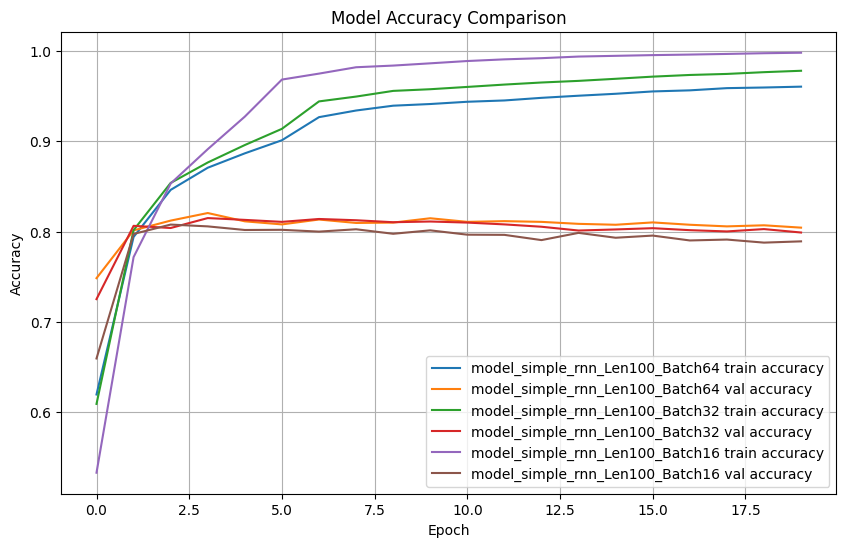

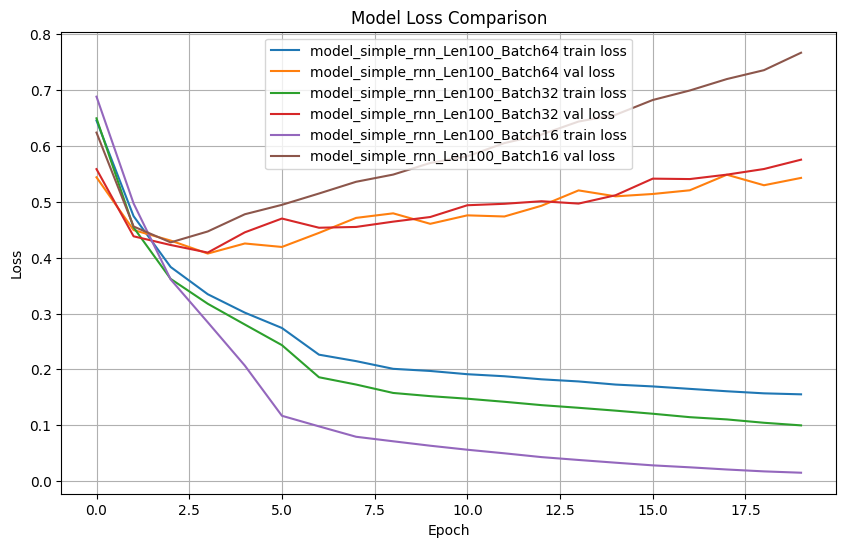

In [55]:
plot_training_histories(histories_1, metric='accuracy')
plot_training_histories(histories_1, metric='loss')

##### Comparaison de la précision du modèle (Model Accuracy Comparison)

La première image montre l'évolution de la précision du modèle sur les ensembles d'entraînement et de validation en fonction des époques d'entraînement, pour différentes tailles de batch :

- **Courbe bleue (Batch64 train accuracy)** et **courbe orange (Batch64 val accuracy)** : Lorsque la `Batch Size` est de 64, la précision de l'entraînement augmente plus lentement, tandis que la précision de validation est légèrement inférieure mais plus stable, indiquant un surapprentissage.

- **Courbe verte (Batch32 train accuracy)** et **courbe rouge (Batch32 val accuracy)** : Pour une `Batch Size` de 32, la précision de l'ensemble d'entraînement est plus élevée, et la performance de validation est relativement stable, montrant un bon équilibre entre les ensembles d'entraînement et de validation, bien qu'un surapprentissage soit également présent.

- **Courbe violette (Batch16 train accuracy)** et **courbe marron (Batch16 val accuracy)** : Avec une `Batch Size` de 16, la précision de l'entraînement augmente rapidement, atteignant presque 1,0, mais la validation est plus fluctuante, ce qui montre également un surapprentissage.

En général, une `Batch Size` plus grande entraîne une augmentation plus lente de la précision d'entraînement, mais offre une performance de validation plus stable. Une `Batch Size` plus petite, bien qu'ayant de bonnes performances d'entraînement, montre davantage de fluctuations sur l'ensemble de validation, et est plus sujette au surapprentissage.

##### Comparaison des pertes du modèle (Model Loss Comparison)

La deuxième image montre l'évolution des pertes sur les ensembles d'entraînement et de validation au fil des époques d'entraînement :

- **Courbe bleue (Batch64 train loss)** et **courbe orange (Batch64 val loss)** : Pour une `Batch Size` de 64, la perte de l'entraînement diminue de manière significative, mais la perte de validation reste élevée et instable, ce qui indique un surapprentissage.

- **Courbe verte (Batch32 train loss)** et **courbe rouge (Batch32 val loss)** : Lorsque la `Batch Size` est de 32, la perte d'entraînement diminue rapidement et la perte de validation présente quelques fluctuations, montrant un certain niveau de surapprentissage.

- **Courbe violette (Batch16 train loss)** et **courbe marron (Batch16 val loss)** : Avec une `Batch Size` de 16, la perte d'entraînement approche rapidement de 0, mais la perte de validation continue d'augmenter, ce qui révèle un surapprentissage marqué.

Globalement, une `Batch Size` plus grande permet de mieux contrôler le surapprentissage, tandis qu'une `Batch Size` plus petite, bien que réduisant rapidement la perte d'entraînement, entraîne des performances moins stables sur l'ensemble de validation.

##### Conclusion

- Une `Batch Size` plus grande ralentit la vitesse d'entraînement, mais améliore la stabilité et les capacités de généralisation du modèle sur l'ensemble de validation.
- Une `Batch Size` plus petite donne de bons résultats sur l'ensemble d'entraînement, mais entraîne davantage de fluctuations sur l'ensemble de validation, favorisant le surapprentissage.

En se basant sur ces observations, nous avons finalement déterminé que la `Batch Size` de 32 constitue un choix équilibré pour optimiser la vitesse d'entraînement et les performances de généralisation.


#### 1.1.2 Analyse de l'impact de la taille de maxlen sur le modèle RNN

Après l'entraînement, nous avons obtenu deux graphiques comparant en détail l'impact de différentes valeurs de `maxlen` sur les performances d'entraînement et de validation du modèle RNN.


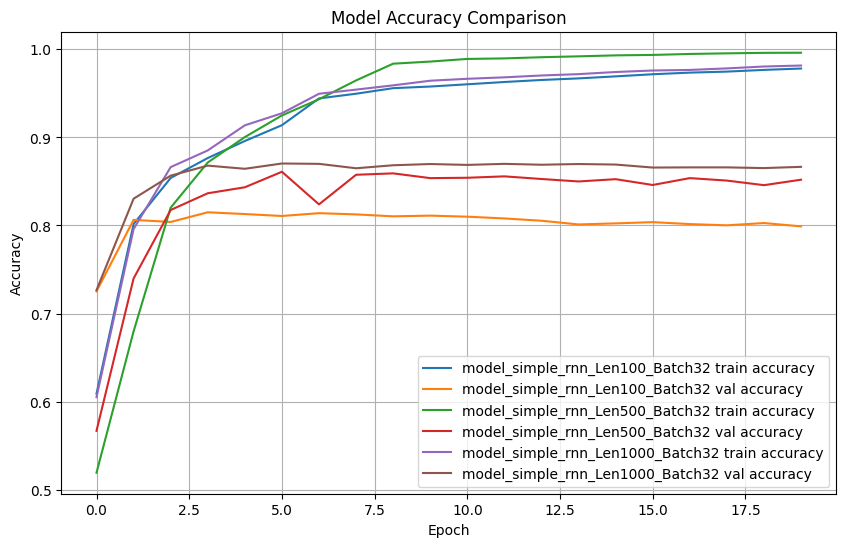

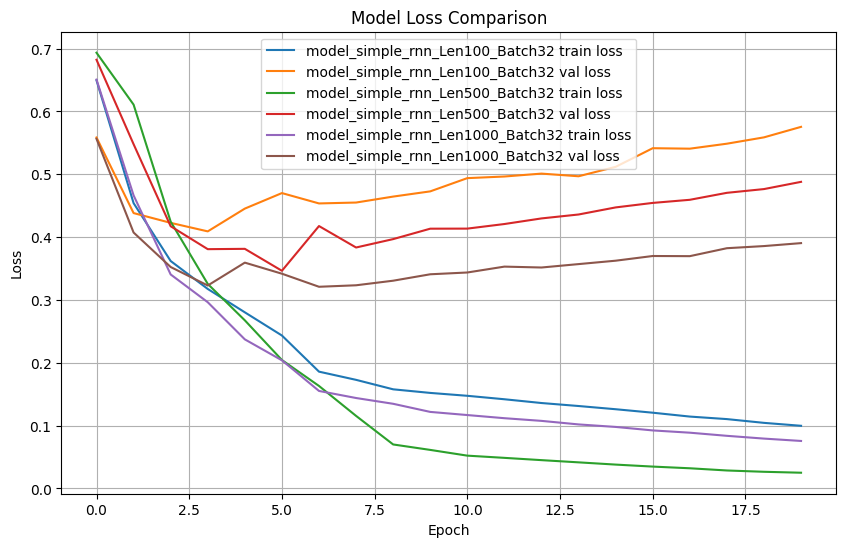

In [ ]:
plot_training_histories(histories_2, metric='accuracy')
plot_training_histories(histories_2, metric='loss')

##### Comparaison de la précision du modèle (Model Accuracy Comparison)

La première image compare l'impact de différentes longueurs de séquence (`maxlen`) sur la précision de l'entraînement et de la validation, avec une taille de lot constante (`Batch Size = 32`) pour tous les modèles.

- **Courbe bleue** (Len100 train) et **courbe orange** (Len100 val) : Avec une longueur de séquence de 100, la précision de l'entraînement augmente rapidement, mais la précision de validation fluctue autour de 0,8, indiquant un phénomène de surapprentissage.

- **Courbe verte** (Len500 train) et **courbe rouge** (Len500 val) : Pour une longueur de séquence de 500, les précisions d'entraînement et de validation sont proches, et la performance de validation est plus stable, montrant une meilleure capacité de généralisation.

- **Courbe violette** (Len1000 train) et **courbe marron** (Len1000 val) : Avec une longueur de séquence de 1000, les précisions d'entraînement et de validation sont toutes deux stables et élevées, montrant que le modèle capture des informations contextuelles plus riches, améliorant ainsi la performance globale.

##### Comparaison des pertes du modèle (Model Loss Comparison)

La deuxième image montre les pertes d'entraînement et de validation pour différentes longueurs de séquence.

- **Courbe bleue** (Len100 train) et **courbe orange** (Len100 val) : Avec une longueur de séquence de 100, la perte d'entraînement diminue rapidement, mais la perte de validation fluctue de manière importante, indiquant un surapprentissage sévère.

- **Courbe verte** (Len500 train) et **courbe rouge** (Len500 val) : Avec une longueur de séquence de 500, la perte de validation fluctue moins, offrant une meilleure stabilité et une meilleure capacité de généralisation.

- **Courbe violette** (Len1000 train) et **courbe marron** (Len1000 val) : Pour une longueur de séquence de 1000, les pertes d'entraînement et de validation sont toutes deux faibles et stables, ce qui indique une adaptabilité plus forte du modèle, sans surapprentissage.

D'après les courbes de perte, des séquences plus longues contribuent à améliorer la capacité de généralisation du modèle, rendant la perte de validation plus stable et en diminution constante.

##### Conclusion

- Une longueur de séquence courte (par exemple, `maxlen=100`) tend à provoquer un surapprentissage, et la performance sur l'ensemble de validation est instable.
- Des longueurs de séquence plus longues (comme `maxlen=500` ou `maxlen=1000`) améliorent la capacité de généralisation, avec des performances de validation plus stables et des pertes plus faibles.
- Augmenter la longueur de séquence de manière appropriée peut améliorer significativement les performances du modèle, bien qu'un compromis avec le coût de calcul soit nécessaire.


#### 1.1.3 Analyse de l'impact de la taille de la couche cachée sur le modèle RNN

Après l'entraînement, nous avons obtenu deux graphiques comparant en détail l'impact de différentes tailles de la couche cachée sur les performances d'entraînement et de validation du modèle RNN.


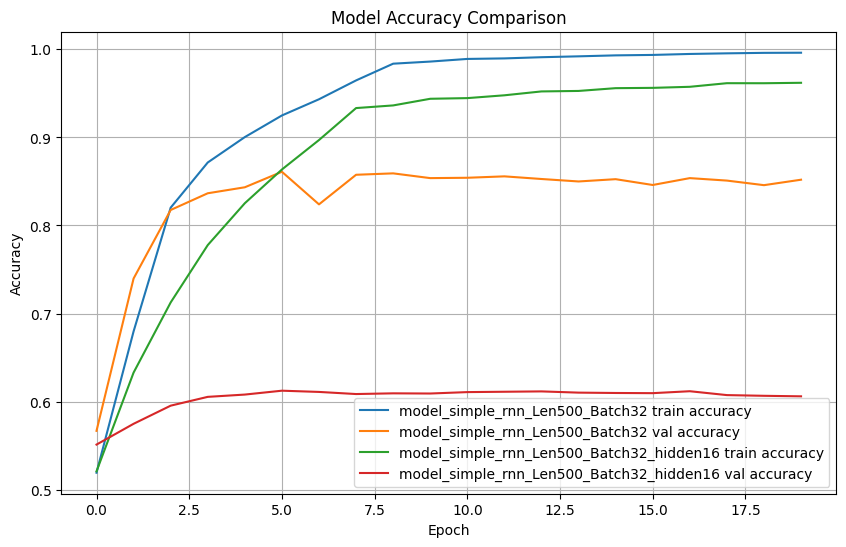

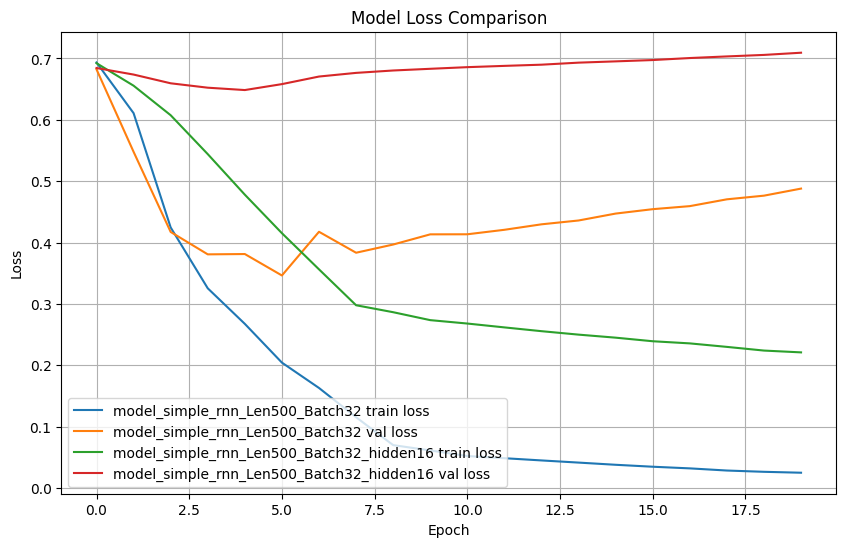

In [54]:
plot_training_histories(histories_3, metric='accuracy')
plot_training_histories(histories_3, metric='loss')

##### Comparaison de la précision du modèle

La première image montre l'impact du nombre d'unités cachées sur la précision du modèle RNN, avec une longueur de séquence de 500 et une taille de batch de 32.

- **Courbe bleue (64 unités train)** et **courbe orange (64 unités val)** : La précision d'entraînement atteint rapidement 1,0, tandis que la précision de validation reste stable autour de 0,8, indiquant un surapprentissage.
- **Courbe verte (16 unités train)** et **courbe rouge (16 unités val)** : La précision d'entraînement augmente plus lentement, et la précision de validation reste stable à 0,6, ce qui montre que le faible nombre d'unités cachées limite la capacité d'apprentissage.

En général, l'augmentation du nombre d'unités cachées améliore la précision d'entraînement, mais augmente également le risque de surapprentissage.

##### Comparaison des pertes du modèle

La deuxième image montre l'évolution des pertes d'entraînement et de validation pour différents nombres d'unités cachées.

- **Courbe bleue (64 unités train)** et **courbe orange (64 unités val)** : La perte d'entraînement diminue rapidement, mais la perte de validation, après une baisse initiale, commence à augmenter, indiquant un surapprentissage.
- **Courbe verte (16 unités train)** et **courbe rouge (16 unités val)** : La perte d'entraînement diminue plus lentement, tandis que la perte de validation reste fluctuante et élevée, ce qui indique une capacité d'apprentissage insuffisante.

Augmenter le nombre d'unités cachées permet de réduire efficacement la perte d'entraînement, mais peut entraîner une hausse de la perte de validation. En revanche, un nombre d'unités cachées réduit limite la capacité d'apprentissage du modèle.

##### Conclusion
- **Impact du nombre d'unités cachées** : Un nombre plus élevé d'unités cachées améliore la capacité d'entraînement, mais augmente le risque de surapprentissage.
- **Nombre réduit d'unités cachées** : Limite les performances d'apprentissage du modèle.


#### 1.1.4 Analyse de l'impact du changement de fonction de perte sur le modèle RNN

Après l'entraînement, nous avons obtenu deux graphiques comparant en détail l'impact de différentes fonctions de perte (entropie croisée binaire et MSE) sur les performances d'entraînement et de validation du modèle RNN.


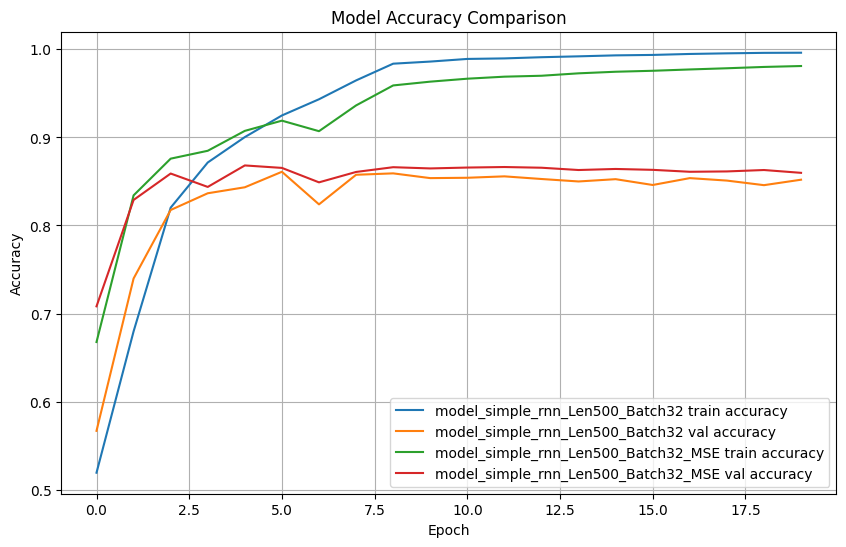

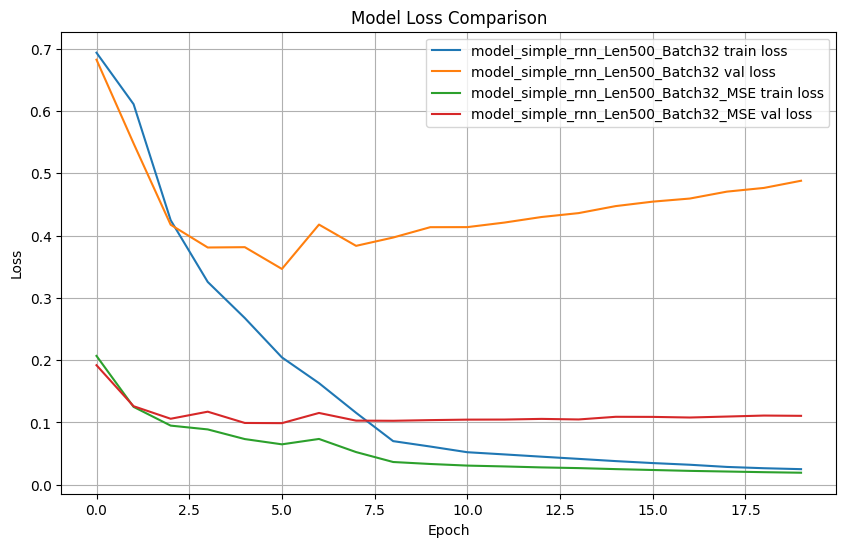

In [53]:
plot_training_histories(histories_4, metric='accuracy')
plot_training_histories(histories_4, metric='loss')

##### Comparaison de la précision du modèle

L'image montre l'impact des différentes fonctions de perte sur la précision d'entraînement et de validation du modèle RNN, avec une longueur de séquence de 500 et une taille de batch de 32.

- **Courbe bleue (cross-entropy train)** et **courbe orange (cross-entropy val)** : La précision d'entraînement monte rapidement à 1,0, mais la précision de validation fluctue autour de 0,85, indiquant un surapprentissage.
- **Courbe verte (MSE train)** et **courbe rouge (MSE val)** : La précision d'entraînement atteint également 1,0, tandis que la précision de validation reste autour de 0,85 avec moins de fluctuations, montrant une meilleure capacité de généralisation par rapport à l'entropie croisée.

##### Comparaison des pertes du modèle

La deuxième image montre l'évolution des pertes sur les ensembles d'entraînement et de validation avec différentes fonctions de perte.

- **Courbe bleue (cross-entropy train)** et **courbe orange (cross-entropy val)** : La perte d'entraînement diminue rapidement jusqu'à 0, mais la perte de validation commence à augmenter après une baisse initiale, ce qui indique un surapprentissage.
- **Courbe verte (MSE train)** et **courbe rouge (MSE val)** : Les pertes d'entraînement et de validation restent faibles, et la tendance à l'augmentation de la perte de validation est plus modérée, montrant que la MSE contrôle mieux la perte de validation.

##### Conclusion
- **Perte par entropie croisée** : Le modèle montre de bonnes performances sur l'ensemble d'entraînement, mais présente un surapprentissage marqué sur l'ensemble de validation.
- **Perte MSE** : Améliore les performances sur l'ensemble de validation et réduit le risque de surapprentissage.


#### 1.1.5 Reference

[1] J. L. Elman, “Finding Structure in Time,” Cognitive Science, vol. 14, no. 2, pp. 179–211, Mar. 1990, doi: https://doi.org/10.1207/s15516709cog1402_1.
‌

### 1.2 mono_LSTM

Nous avons découvert, après consultation de la documentation, que les RNN standards rencontrent des problèmes de disparition ou d'explosion de gradients lors du traitement de longues séquences, ce qui les empêche de capturer des dépendances de longue durée.

Pour remédier à ce problème, le LSTM (Long Short-Term Memory) `[1]` a été introduit. Cette amélioration du RNN utilise un mécanisme de portes pour contrôler la rétention et l'élimination des informations, améliorant ainsi considérablement la capacité à capturer des dépendances à long terme`[2]`. Dans la section `2.2` du rapport, nous testerons la structure LSTM simple.

Après plusieurs expériences, nous avons déterminé un ensemble d'hyperparamètres permettant d'obtenir de meilleurs résultats :

- `num_words = 5000` : Taille du vocabulaire, avec une sélection des 5000 mots les plus courants.
- `embed_size = 128` : Taille de la dimension des embeddings, représentant chaque mot par un vecteur de 128 dimensions.
- `Dropout = 0,4` : Abandon aléatoire de 40 % des neurones pendant l'entraînement pour éviter le surapprentissage.
- `epochs = 20` : Nombre d'époques d'entraînement, pour un total de 20 itérations complètes.

D'après nos recherches, pour le mono_LSTM, le choix des hyperparamètres et du jeu de données a un impact significatif sur les performances du modèle. Les paramètres `Batch size` et `maxlen` ont l'impact le plus important, et nous testerons ces paramètres.

Nous avons modifié les valeurs de `Batch size` et `maxlen` pour évaluer les performances du réseau mono_LSTM dans différents paramètres, dans le but d'évaluer l'impact de ces hyperparamètres sur les performances du modèle. Cela nous aidera à mieux comprendre la capacité d'apprentissage et la précision des prédictions du RNN en fonction de différentes longueurs de séquences de données et tailles de lot.


#### 1.2.1 Analyse de l'impact de la taille du batch sur le modèle mono_LSTM

Après l'entraînement, nous avons obtenu deux graphiques comparant en détail l'impact de différentes tailles de batch (Batch Size) sur les performances d'entraînement et de validation du modèle mono_LSTM.


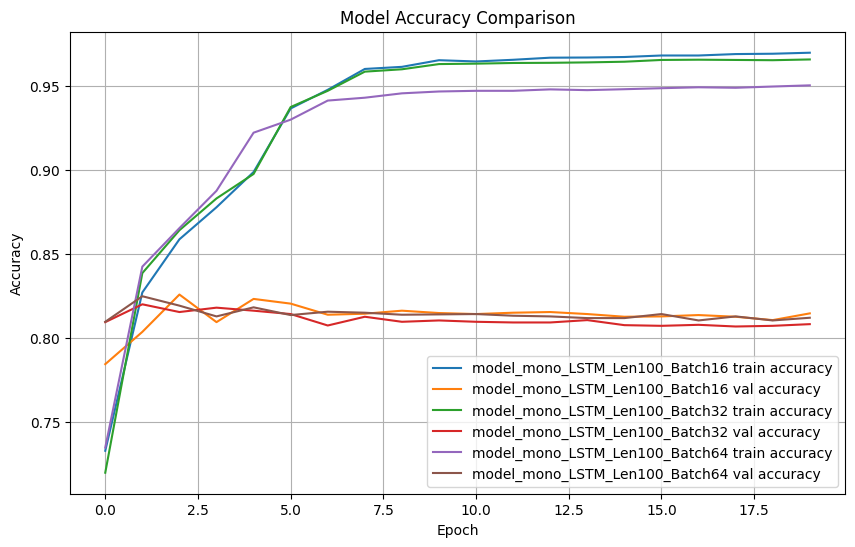

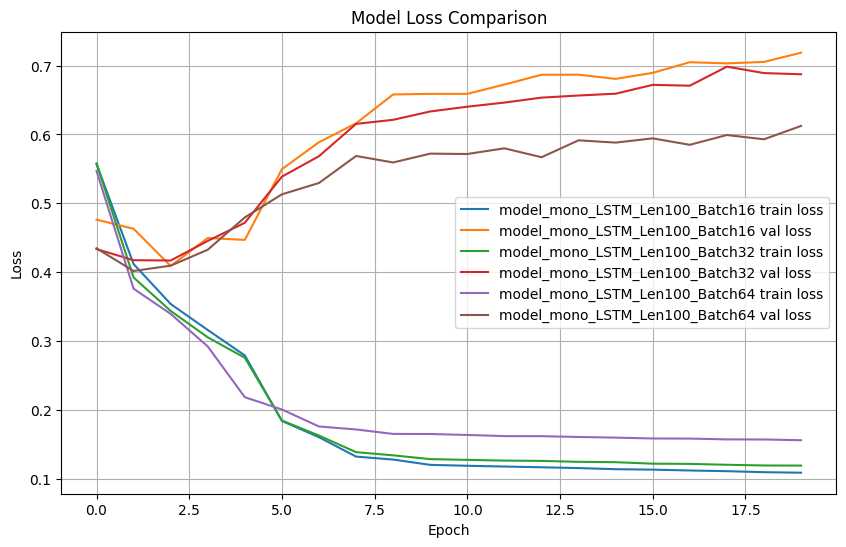

In [52]:
plot_training_histories(histories_5, metric='accuracy')
plot_training_histories(histories_5, metric='loss')

##### Comparaison de la précision du modèle

L'image montre l'impact de différentes tailles de batch sur la précision de l'entraînement et de la validation du modèle LSTM, avec une longueur de séquence de 100.

- **Batch16** : La précision de l'entraînement approche 1,0, tandis que la précision de validation fluctue autour de 0,8, indiquant un surapprentissage.
- **Batch32** : La précision d'entraînement augmente rapidement, et la précision de validation est plus stable, avec une réduction du surapprentissage.
- **Batch64** : La précision de l'entraînement et de la validation est plus stable, avec une précision de validation proche de 0,85, montrant une meilleure capacité de généralisation.

##### Comparaison des pertes du modèle

L'image montre l'évolution des pertes d'entraînement et de validation pour différentes tailles de batch.

- **Batch16** : La perte d'entraînement diminue rapidement, mais la perte de validation commence à augmenter par la suite, indiquant un surapprentissage.
- **Batch32** : La perte d'entraînement diminue rapidement, et la perte de validation est relativement stable, avec une meilleure capacité de généralisation.
- **Batch64** : Les pertes d'entraînement et de validation restent faibles, et la tendance de la perte de validation à augmenter est réduite, améliorant ainsi la stabilité.

##### Conclusion
- **Impact de la taille du batch** : Les petits batches sont plus susceptibles de provoquer un surapprentissage.
- **Avantages d'un batch plus grand** : Les batches plus grands réduisent le surapprentissage et améliorent la capacité de généralisation.


#### 1.2.2 Analyse de l'impact de la taille de maxlen sur le modèle mono_LSTM

Après l'entraînement, nous avons obtenu deux graphiques comparant en détail l'impact de différentes valeurs de `maxlen` sur les performances d'entraînement et de validation du modèle mono_LSTM.


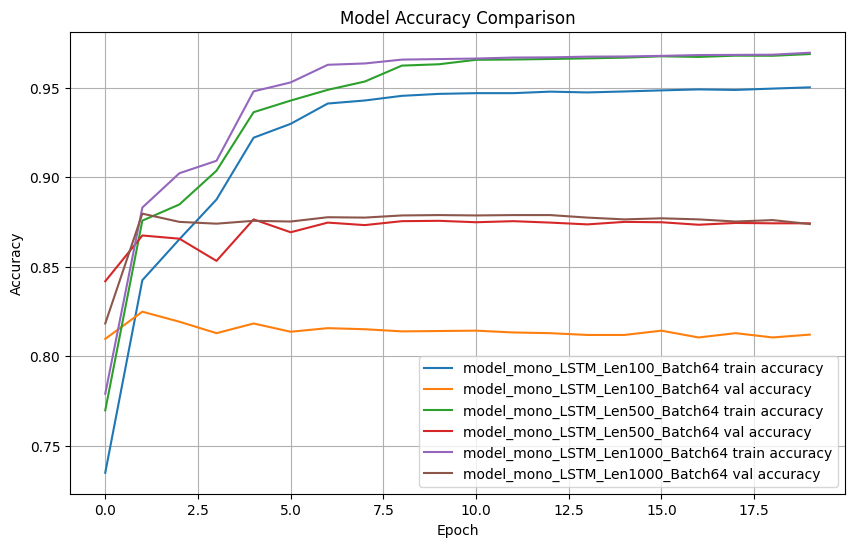

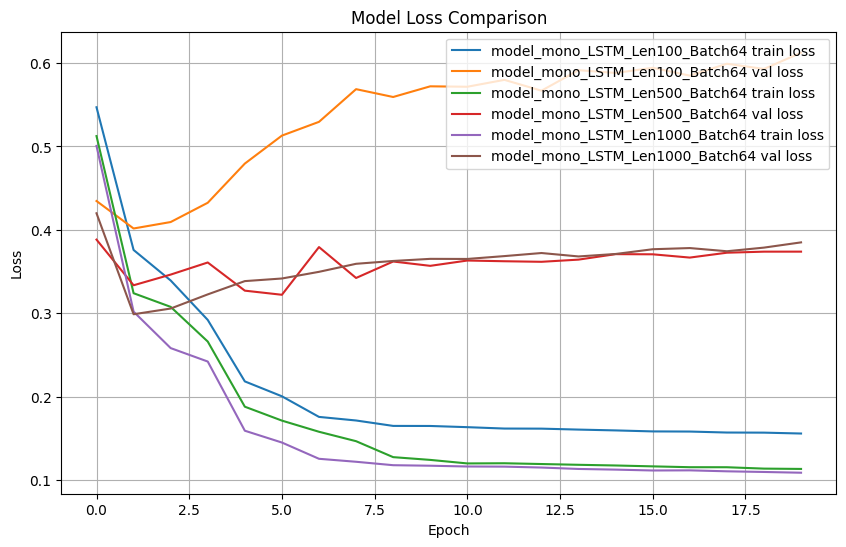

In [51]:
plot_training_histories(histories_6, metric='accuracy')
plot_training_histories(histories_6, metric='loss')

##### Comparaison de la précision du modèle (Model Accuracy Comparison)

La première image montre l'impact de différentes longueurs de séquence (`maxlen`) sur la précision du modèle LSTM dans les ensembles d'entraînement et de validation, avec une taille de batch de 64.

- **Courbe bleue (Len100 train accuracy)** et **courbe orange (Len100 val accuracy)** : Avec une longueur de séquence de 100, la précision de l'entraînement augmente rapidement, mais la précision de validation reste stable autour de 0,8, ce qui indique que le modèle ne parvient pas à capturer suffisamment d'informations contextuelles avec de courtes séquences, limitant sa capacité de généralisation.

- **Courbe verte (Len500 train accuracy)** et **courbe rouge (Len500 val accuracy)** : Avec une longueur de séquence de 500, la précision de l'entraînement atteint presque 1,0 et la précision de validation s'élève à 0,85, montrant une meilleure capacité de généralisation. Par rapport aux séquences courtes, le modèle capture davantage d'informations contextuelles.

- **Courbe violette (Len1000 train accuracy)** et **courbe marron (Len1000 val accuracy)** : Avec une longueur de séquence de 1000, la précision de l'entraînement atteint 1,0 et la précision de validation est également très stable, indiquant que des séquences longues permettent au modèle de mieux apprendre les schémas complexes des données.

##### Comparaison des pertes du modèle (Model Loss Comparison)

La deuxième image montre l'évolution des pertes du modèle LSTM dans les ensembles d'entraînement et de validation en fonction de la longueur de séquence.

- **Courbe bleue (Len100 train loss)** et **courbe orange (Len100 val loss)** : Avec une longueur de séquence de 100, la perte d'entraînement diminue rapidement, mais la perte de validation reste élevée, indiquant un surapprentissage important.

- **Courbe verte (Len500 train loss)** et **courbe rouge (Len500 val loss)** : Avec une longueur de séquence de 500, les pertes d'entraînement et de validation sont relativement stables, et la perte de validation diminue de manière significative, montrant une bonne capacité de généralisation.

- **Courbe violette (Len1000 train loss)** et **courbe marron (Len1000 val loss)** : Avec une longueur de séquence de 1000, les pertes d'entraînement et de validation sont toutes deux faibles et stables, et la perte de validation reste relativement stable, montrant une bonne adaptabilité du modèle aux données et une forte capacité de généralisation.

##### Conclusion
- **Impact de la longueur de séquence** : Des séquences courtes (par ex. 100) limitent la capacité de généralisation du modèle, entraînant de moins bonnes performances en validation.
- **Avantages d'augmenter la longueur de séquence** : Des séquences plus longues (par ex. 500 ou 1000) aident le modèle à capturer davantage d'informations contextuelles, améliorant la capacité de généralisation et les performances en validation.
- **Choisir une longueur de séquence appropriée** : L'augmentation de la longueur de séquence peut améliorer significativement les performances du modèle, mais il faut également prendre en compte les coûts de calcul et le temps d'entraînement. Généralement, des séquences plus longues offrent un avantage dans la capture d'informations complexes.


#### 1.2.3 Reference

[1] " Long Short-term Memory,” ResearchGate. https://www.researchgate.net/publication/13853244_Long_Short-term_Memory

[2] A. Graves, “Generating Sequences With Recurrent Neural Networks,” arXiv.org, 2013. https://arxiv.org/abs/1308.0850
‌
‌

### 1.3 bi_LSTM

Nous avons découvert, après consultation de la documentation, qu'un LSTM unidirectionnel ne peut traiter les données de la séquence temporelle que dans une seule direction, du passé vers le futur. Lorsqu'il traite une séquence d'entrée, l'information ne circule que de gauche à droite, c'est-à-dire des étapes temporelles antérieures aux étapes ultérieures. Ainsi, un LSTM unidirectionnel ne peut pas capturer pleinement les informations contextuelles bidirectionnelles de la séquence complète, ce qui le rend moins performant pour des tâches nécessitant des informations provenant de l'avenir.

Le Bi-LSTM, quant à lui, introduit deux flux d'information : un de gauche à droite (du passé vers le futur) et l'autre de droite à gauche (du futur vers le passé). Ce double flux permet au modèle de prendre en compte simultanément les informations antérieures et ultérieures de la séquence. Le Bi-LSTM est donc capable de capturer plus efficacement le contexte global de la séquence, et il se révèle particulièrement performant pour les tâches qui dépendent des informations provenant de l'ensemble de la séquence.

Dans la section `2.3` du rapport, nous allons tester la structure bi_LSTM.

Après plusieurs expériences, nous avons déterminé un ensemble d'hyperparamètres permettant d'obtenir de meilleurs résultats :

- `num_words = 5000` : Taille du vocabulaire, en sélectionnant les 5000 mots les plus fréquents.
- `embed_size = 128` : Taille de la dimension des embeddings, en représentant chaque mot par un vecteur de 128 dimensions.
- `Dropout = 0,4` : Abandon aléatoire de 40 % des neurones pendant l'entraînement pour éviter le surapprentissage.
- `epochs = 20` : Nombre d'époques d'entraînement, pour un total de 20 itérations complètes.

D'après nos recherches, pour le bi_LSTM, le choix des hyperparamètres et du jeu de données a un impact significatif sur les performances du modèle. Les paramètres `Batch size`, `maxlen` et `Hidden size` ont l'impact le plus important, et nous testerons ces paramètres.

Nous avons modifié les valeurs de `Batch size`, `maxlen` et `Hidden size` pour évaluer les performances du réseau bi_LSTM dans différents paramètres, dans le but d'évaluer l'impact de ces hyperparamètres sur les performances du modèle. Cela nous aidera à mieux comprendre la capacité d'apprentissage et la précision des prédictions du RNN en fonction de différentes longueurs de séquences de données et tailles de lot.


#### 1.3.1 Analyse de l'impact de la taille du batch sur le modèle bi_LSTM

Après l'entraînement, nous avons obtenu deux graphiques comparant en détail l'impact de différentes tailles de batch (Batch Size) sur les performances d'entraînement et de validation du modèle bi_LSTM.


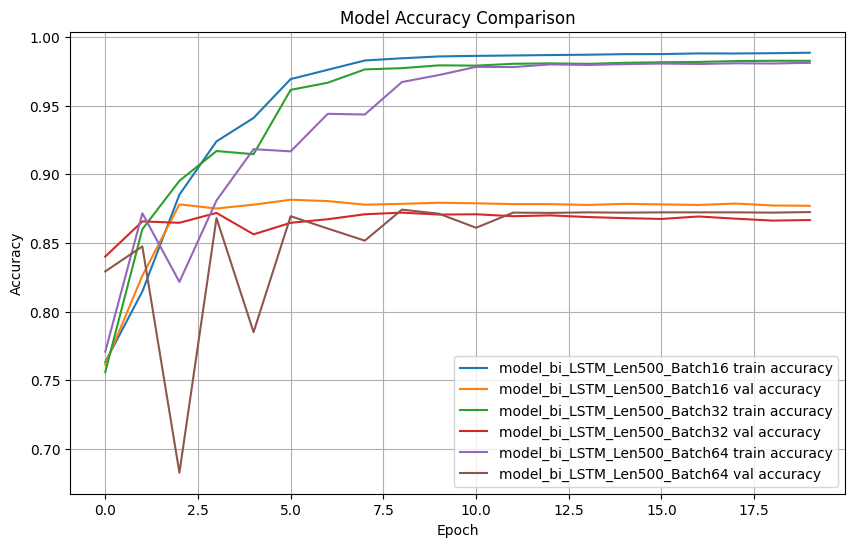

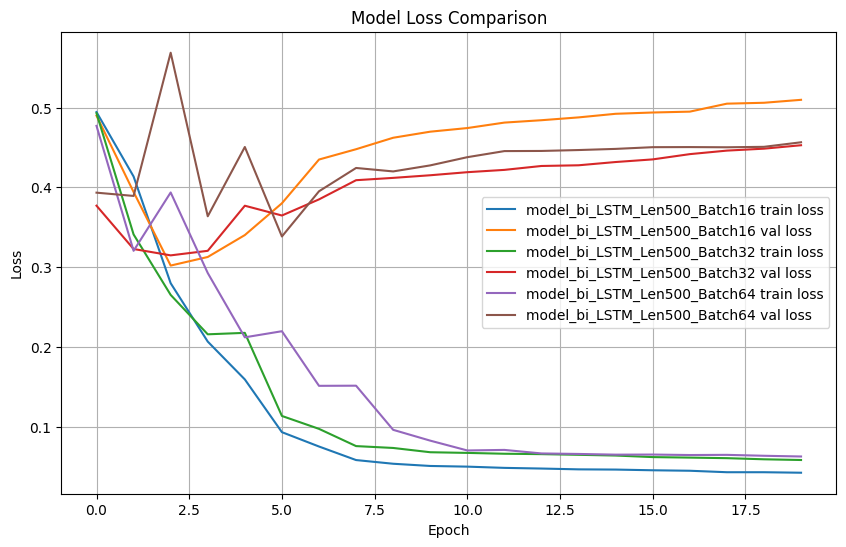

In [ ]:
plot_training_histories(histories_7, metric='accuracy')
plot_training_histories(histories_7, metric='loss')

##### Conclusion

- Impact de la taille du batch : Les petits batches (16) sont plus sujets au surapprentissage, tandis qu'un batch de taille moyenne (32) équilibre la vitesse d'entraînement et la capacité de généralisation.

- Effet des batches plus grands : Avec une taille de batch de 64, les performances sur l'ensemble d'entraînement sont bonnes, mais celles de l'ensemble de validation sont légèrement inférieures.

- Choix de la taille de batch appropriée : Un batch de taille moyenne (32) donne les meilleurs résultats lors de l'entraînement du Bi-LSTM, améliorant la stabilité et la capacité de généralisation.


#### 1.3.2 Analyse de l'impact de la taille de max_len sur le modèle bi_LSTM

Après l'entraînement, nous avons obtenu deux graphiques comparant en détail l'impact de différentes valeurs de `max_len` sur les performances d'entraînement et de validation du modèle bi_LSTM.


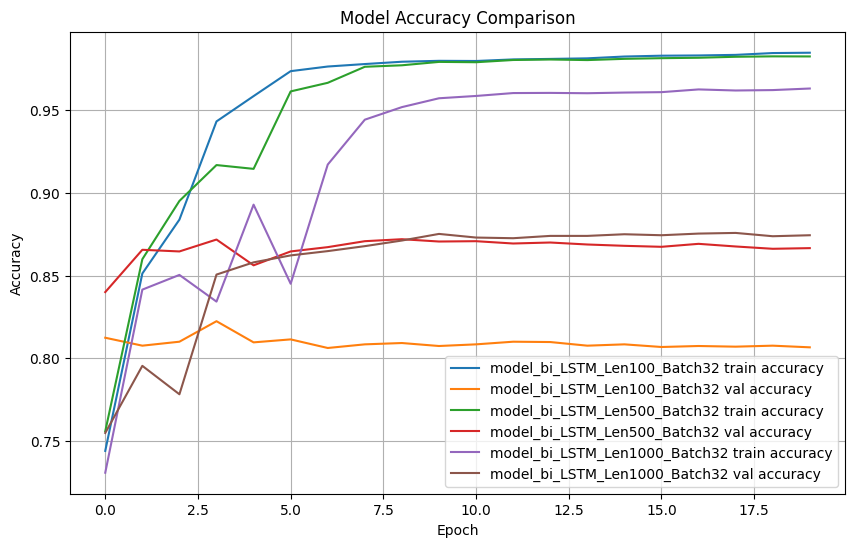

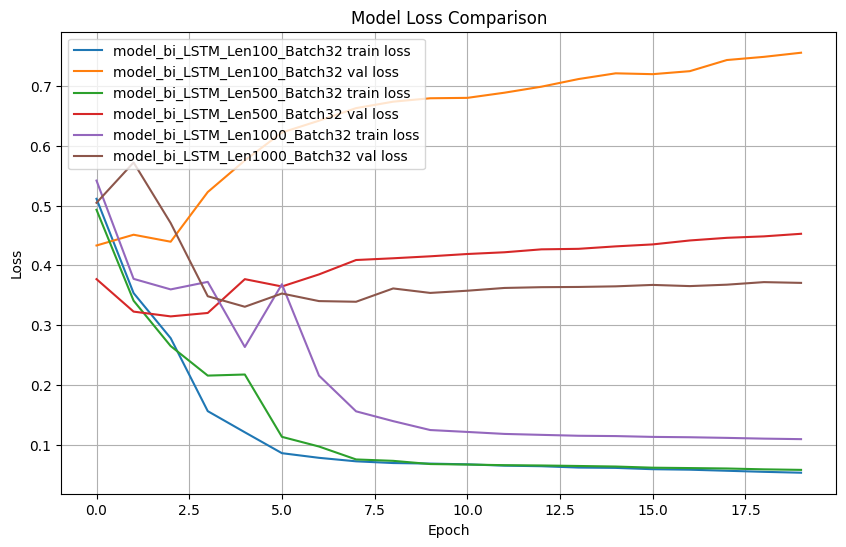

In [56]:
plot_training_histories(histories_8, metric='accuracy')
plot_training_histories(histories_8, metric='loss')

##### Conclusion
- **Impact de la longueur de séquence** : Des séquences courtes (par exemple, 100) limitent la capacité de généralisation du modèle, entraînant de moins bonnes performances sur l'ensemble de validation.
- **Avantages des séquences plus longues** : Des séquences plus longues (comme 500 et 1000) aident le modèle à capturer davantage d'informations contextuelles, améliorant ainsi les performances sur l'ensemble de validation.
- **Choix d'une longueur de séquence appropriée** : Les longues séquences peuvent améliorer les performances du modèle, surtout pour les tâches nécessitant une capture du contexte global, mais elles impliquent un coût de calcul et une complexité du modèle accrus.




#### 1.3.3 Analyse de l'impact de la taille de la couche cachée sur le modèle bi_LSTM

Nous avons comparé en détail l'impact de différentes tailles de la couche cachée (`hidden size`) sur les performances d'entraînement et de validation du modèle bi_LSTM.


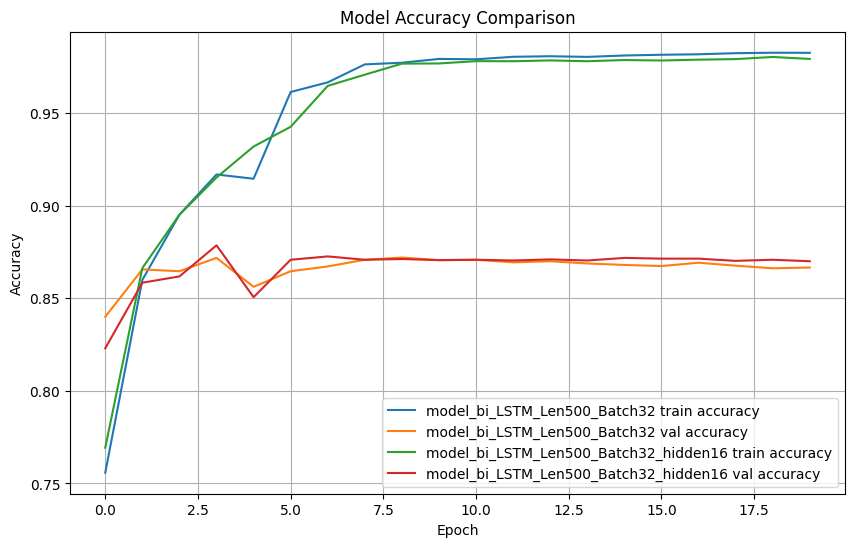

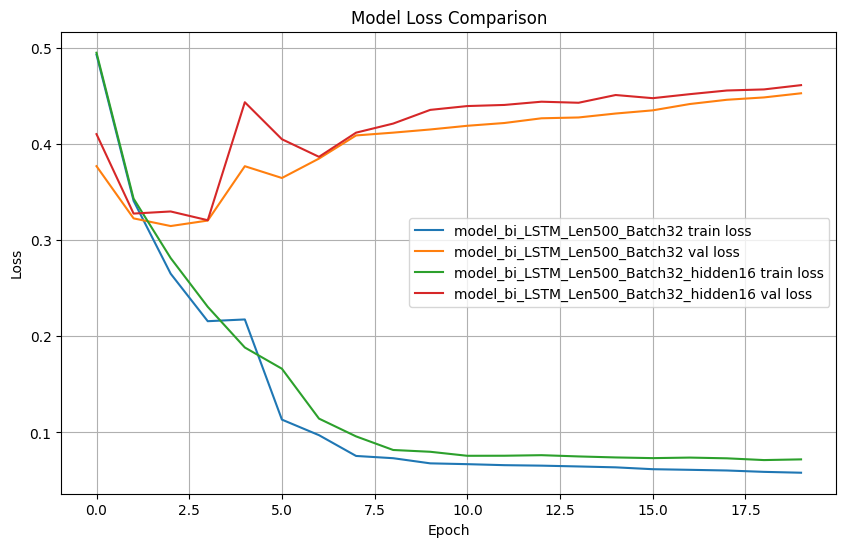

In [57]:
plot_training_histories(histories_9, metric='accuracy')
plot_training_histories(histories_9, metric='loss')

##### Conclusion
Après observation, le nombre de couches cachées n'a pas d'impact significatif sur la structure bi_LSTM, probablement parce que le LSTM bidirectionnel possède déjà une forte capacité d'extraction de caractéristiques. Pour le jeu de données et la tâche actuels, l'ajout de couches cachées supplémentaires n'améliore pas les performances du modèle. De plus, un nombre accru de couches cachées augmente également la complexité de calcul, ce qui entraîne une augmentation du temps d'entraînement.


### 1.4 multi_layer_LSTM

Dans notre expérience, nous avons d'abord utilisé un modèle BLSTM à trois couches pour l'entraînement et avons obtenu une précision de 0,801.

Ensuite, après consultation de la documentation `[1]`, nous avons tenté de combiner deux couches CNN avec une couche BLSTM, ce qui a permis d'augmenter la précision du modèle à 0,867 et de réduire le temps de calcul pour chaque epoch (311 lots, taille de lot = 64) de 600 minutes à 36 minutes. Par conséquent, nous pensons que l'introduction de couches CNN non seulement améliore l'efficacité de calcul, mais augmente également la précision des prédictions de manière significative.

#### 1.4.4 Contexte et défis
Grâce à son efficacité pour traiter les données séquentielles, le LSTM est souvent largement utilisé dans les tâches de traitement du langage naturel, y compris l'analyse des sentiments. Cependant, l'utilisation du LSTM seul présente certaines limites, notamment dans l'extraction des caractéristiques locales. Lors de nos expérimentations avec des BLSTM multicouches, nous avons constaté qu'en augmentant le nombre de couches, la complexité du modèle augmentait également de manière significative, entraînant un surapprentissage sur les données d'entraînement et une faible généralisation sur les données de test. Ce phénomène montre que bien que les BLSTM multicouches puissent améliorer la capture des dépendances à long terme, ils tendent à entraîner une complexité excessive, limitant ainsi les performances du modèle dans des cas de données limitées.

#### 1.4.2 Introduction et avantages des CNN
Nous avons constaté que l'introduction de couches CNN dans le modèle BLSTM peut atténuer efficacement les problèmes susmentionnés. L'analyse spécifique est la suivante :
- **Extraction des caractéristiques locales** : Les CNN peuvent extraire des caractéristiques locales adjacentes dans le texte à l'aide d'un mécanisme de fenêtres glissantes via les filtres de convolution. Pour les tâches d'analyse des sentiments, cette extraction de caractéristiques locales permet de capturer les informations sémantiques fines au niveau des phrases et des expressions, rendant le modèle plus sensible aux variations contextuelles des émotions.
- **Réduction de la dimension et stabilisation des caractéristiques** : Les couches de pooling des CNN (par exemple, le max-pooling) peuvent réduire la dimensionnalité des caractéristiques tout en préservant les informations essentielles. Cela permet de réduire la complexité de calcul du modèle tout en améliorant la stabilité des caractéristiques et la robustesse du modèle. Cette propriété est particulièrement utile pour éviter le surapprentissage des modèles complexes, surtout dans le cas de jeux de données comme IMDB où la taille de l'échantillon est relativement limitée, permettant au CNN d'améliorer de manière significative la capacité de généralisation du modèle.
- **Complémentarité avec le LSTM** : Bien que le LSTM soit performant pour capturer les dépendances à long terme, il peut être insuffisant pour traiter les caractéristiques locales. L'ajout de couches CNN permet de combler cette lacune, rendant le modèle plus efficace dans la compréhension simultanée du contexte local et global. En utilisant les couches CNN pour extraire d'abord les caractéristiques locales, puis en transmettant ces caractéristiques aux couches BLSTM pour capturer les dépendances à long terme de la séquence, le modèle est en mesure de comprendre plus pleinement la sémantique du texte.

#### 1.4.3 Résultats et conclusion
Dans notre expérience, le modèle combinant deux couches CNN et une couche BLSTM sur le jeu de données IMDB surpasse non seulement le modèle BLSTM à trois couches en termes de précision (0,867 contre 0,801), mais montre également une optimisation significative en termes de temps de calcul (le temps par epoch est passé de 600 minutes à 36 minutes). Cela est dû au fait que le CNN, dans la phase de traitement initiale, extrait et réduit la dimensionnalité des caractéristiques, fournissant ainsi des entrées plus représentatives à la couche BLSTM suivante tout en réduisant la charge de calcul.

En somme, étant donné la taille limitée du jeu de données IMDB et la tendance des BLSTM multicouches à surapprendre, l'ajout de couches CNN permet non seulement d'extraire efficacement les caractéristiques sémantiques locales du texte, mais aussi de compléter les capacités de traitement des dépendances à long terme du BLSTM. Cette combinaison optimise les performances globales du modèle, augmentant la précision et la capacité de généralisation tout en réduisant de manière significative le temps d'entraînement.







#### 1.4.4 Analyse de l'impact de la taille de max_len sur notre modele 

Nous avons comparé en détail l'impact de différentes tailles de la couche cachée (`hidden size`) sur les performances d'entraînement et de validation du modèle bi_LSTM.

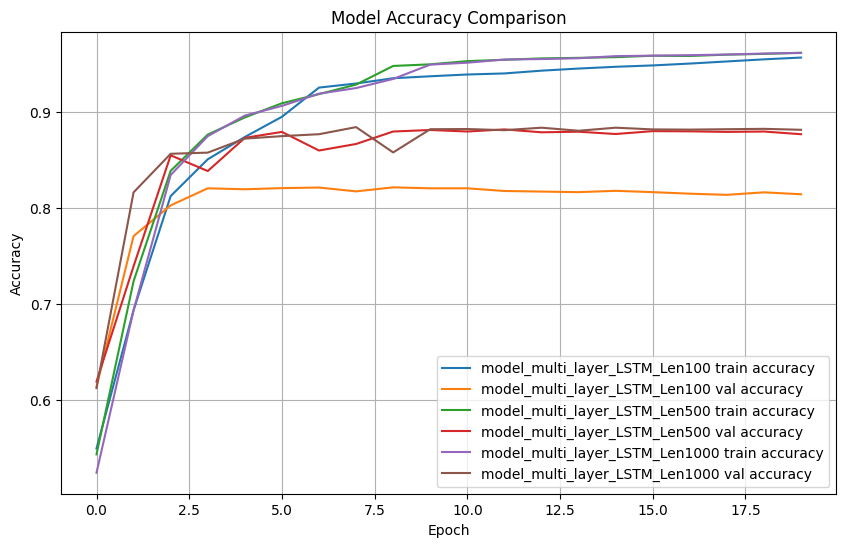

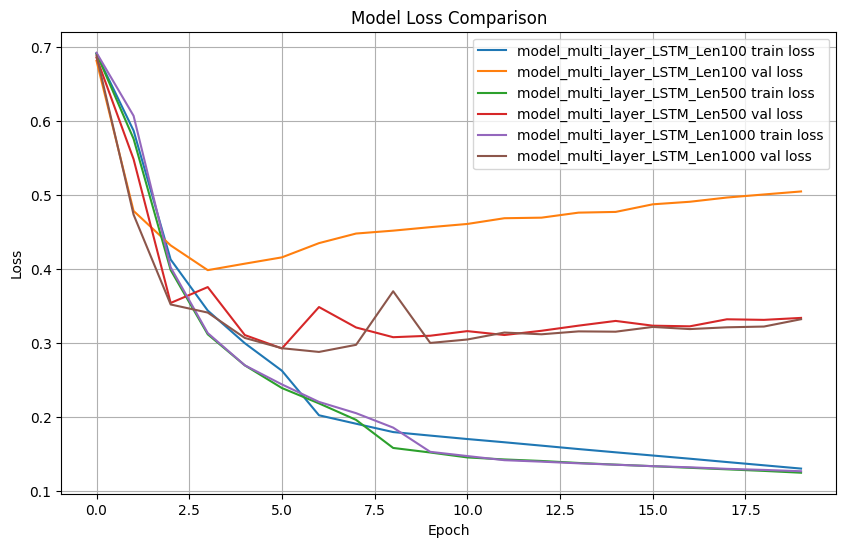

In [58]:
plot_training_histories(histories_10, metric='accuracy')
plot_training_histories(histories_10, metric='loss')

##### Comparaison de la précision du modèle (Model Accuracy Comparison)

L'image montre les performances du modèle LSTM multicouche en termes de précision sur les ensembles d'entraînement et de validation pour différentes longueurs de séquence (`maxlen`), avec une taille de batch fixe de 32.

De manière générale, plus la longueur de la séquence est grande, meilleures sont les performances du modèle LSTM multicouche en termes de précision d'entraînement et de validation. En particulier pour les séquences plus longues, le modèle est capable de mieux capturer les informations contextuelles, améliorant ainsi sa capacité de généralisation.

##### Image 2 : Comparaison des pertes du modèle (Model Loss Comparison)

La deuxième image montre les variations de la perte d'entraînement et de validation pour le modèle LSTM multicouche en fonction de différentes longueurs de séquence.

Les courbes de perte indiquent que plus la longueur de la séquence est grande, plus la perte de validation est faible, ce qui réduit le surapprentissage. En particulier, avec une longueur de séquence de 1000, la stabilité et le faible niveau de la perte de validation montrent que le modèle gère bien les informations contextuelles complexes.

##### Conclusion
- **Impact de la longueur de séquence** : Les séquences courtes (par exemple, 100) permettent d'augmenter rapidement la précision d'entraînement, mais entraînent un surapprentissage sur l'ensemble de validation, limitant ainsi la capacité de généralisation.
- **Avantages des séquences plus longues** : Pour des longueurs de séquence de 500 et 1000, le modèle LSTM multicouche montre une amélioration notable des performances sur l'ensemble de validation, avec une réduction significative de la perte de validation. Cela montre que des séquences plus longues aident à capturer davantage d'informations contextuelles, renforçant la capacité de généralisation du modèle.
- **Longueur de séquence recommandée** : Pour les tâches nécessitant la capture de dépendances à long terme et d'informations contextuelles complexes, il est recommandé d'utiliser une longueur de séquence plus longue (par exemple, 1000) pour améliorer l'effet de généralisation du modèle et réduire les risques de surapprentissage.


#### 1.4.5 Reference
[1] Qianzi Shen, Zijian Wang, Yaoru Sun. Sentiment Analysis of Movie Reviews Based on CNN-BLSTM.2nd International Conference on Intelligence Science (ICIS), Oct 2017, Shanghai, China. pp.164-171,ff10.1007/978-3-319-68121-4_17ff. ffhal-01820937f

### 1.5 Comparaison de quatre modèles

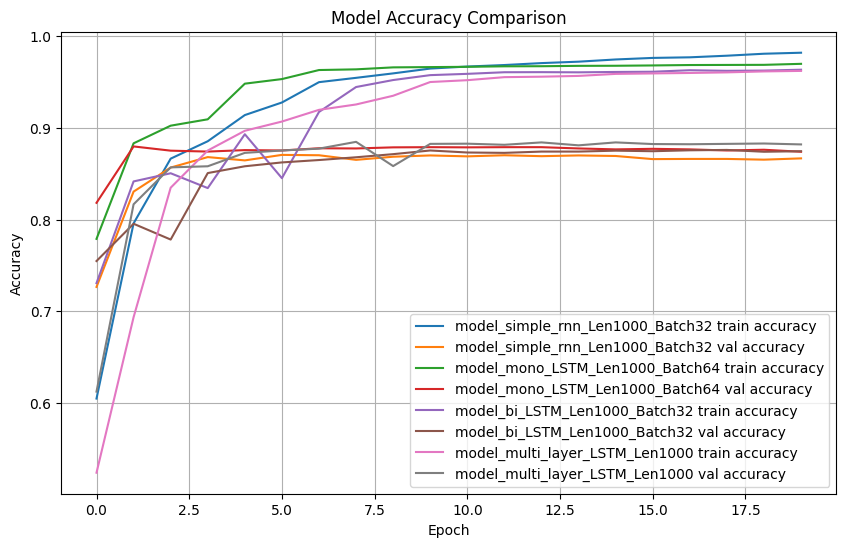

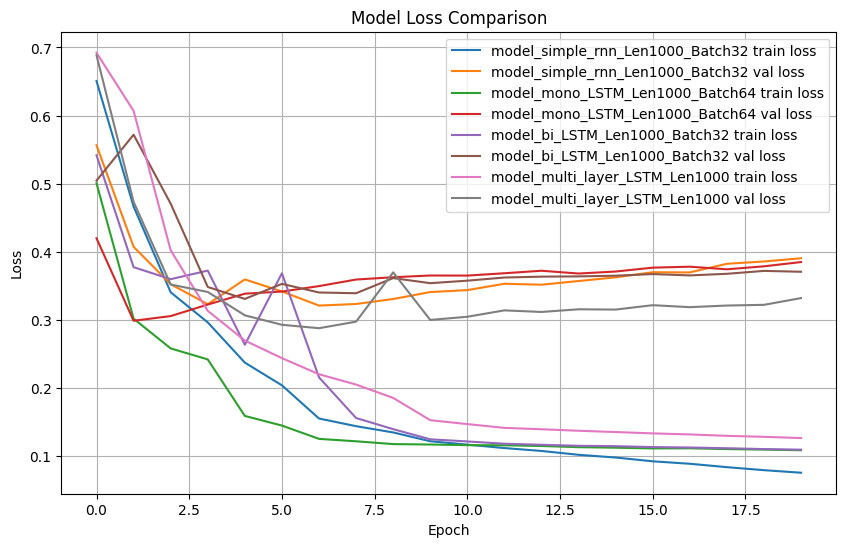

In [ ]:

histories_11 = {
    'model_simple_rnn_Len1000_Batch32': history_simple_rnn_Len1000_Batch32,
    'model_mono_LSTM_Len1000_Batch64': history_mono_LSTM_Len1000_Batch64,
    'model_bi_LSTM_Len1000_Batch32': history_bi_LSTM_Len1000_Batch32,
    'model_multi_layer_LSTM_Len1000': history_multi_layer_LSTM_Len1000,

}
plot_training_histories(histories_11, metric='accuracy')
plot_training_histories(histories_11, metric='loss')

##### Comparaison des modèles et analyse des performances

- Dans l'ensemble des entraînements, le RNN a obtenu les meilleures performances en termes de précision et de perte, mais a montré une instabilité et des fluctuations importantes sur l'ensemble de test, indiquant un surapprentissage sévère.
- Les performances du Simple RNN et du LSTM unidirectionnel sont inférieures à celles du Bi-LSTM et du LSTM multicouche, avec notamment une plus grande variabilité sur l'ensemble de validation, montrant un manque de capacité de généralisation.
- Le LSTM multicouche a montré des performances moindres pendant l'entraînement, mais a obtenu les meilleurs résultats sur l'ensemble de test, démontrant une meilleure capacité de généralisation, ce qui souligne l'efficacité de la structure CNN intégrée.
- Pour les tâches nécessitant la capture d'informations contextuelles étendues et une haute précision, il est recommandé d'utiliser le Bi-LSTM ou le LSTM multicouche.


## 2. Partie du code

In [2]:
# Dans ce notebook, nous allons nous intéresser à des tâches d'analyse de sentiments
# -> c'est à dire prédire un label de sentiment (ici positif ou négatif) à partir d'un texte

# Ce notebook vise à approfondir : 
# - L'application du DL sur des données textuelles
# - La compréhension des architectures RNN avancées comme les LSTM et les mécanismes d'attention


In [3]:
# 1. Importation des modules
import math
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, LSTM, SimpleRNN, Embedding, Dropout, Bidirectional, Conv1D, MaxPooling1D
from keras.models import Sequential
from keras.regularizers import l2
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix

from keras.optimizers import Adam, RMSprop




In [4]:
# 2. Charger les données
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=5000)
# print("La phrase avant padding est : \n {}".format(x_train[0]))

In [5]:
#  3. Formater/Préparer les données de train
def pad_data_x_train(maxlen, x_train):

    x_train_padded = pad_sequences(x_train, maxlen=maxlen, truncating='post')
    

    # print("La phrase paddée sur une longueur {} est : \n {}".format(maxlen, x_train_padded[0]))

    # print(len(x_train_padded)) 
    
    return x_train_padded

In [6]:
#  4. Formater/Préparer les données de test
def pad_data_x_test(maxlen, x_test):

    
    x_test_padded = pad_sequences(x_test, maxlen=maxlen, truncating='post')

    # print("La phrase paddée sur une longueur {} est : \n {}".format(maxlen, x_test_padded[0]))

    # print(len(x_test_padded)) 
    
    return x_test_padded

In [ ]:
# 5. Déclaration du réseau
def create_model(model_type='simple_RNN', embed_size=128, hidden_size=64, num_words=5000):
    
    model = Sequential()
    model.add(Embedding(num_words, embed_size))  # Couche d'intégration

    if model_type == 'simple_RNN':
        model.add(SimpleRNN(units=hidden_size, return_sequences=False))  # Couche RNN
        model.add(Dropout(0.25))  # Couche de Dropout

    elif model_type == 'mono_LSTM':
        model.add(LSTM(units=hidden_size, return_sequences=False, kernel_regularizer=l2(0.001)))  # LSTM unidirectionnel avec régularisation L2
        model.add(Dropout(0.4))  # Couche de Dropout

    elif model_type == 'bi_LSTM':
        model.add(Bidirectional(LSTM(units=hidden_size, return_sequences=False)))   # LSTM bidirectionnel
        model.add(Dropout(0.4))                                            # Couche de Dropout

    elif model_type == 'multi_layer_LSTM':
        # Ajout des couches de convolution et de pooling
        model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))  # Couche de convolution
        model.add(MaxPooling1D(pool_size=2))                                       # Couche de pooling
        # model.add(Dropout(0.25))   

        # Ajout des couches de convolution et de pooling
        model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))  # Couche de convolution
        model.add(MaxPooling1D(pool_size=2))                                       # Couche de pooling
        # model.add(Dropout(0.25))  

        # model.add(Bidirectional(LSTM(LSTM_size, return_sequences=True)))           # Première couche LSTM bidirectionnelle, retourne toute la séquence
        # model.add(Bidirectional(LSTM(LSTM_size, return_sequences=True)))           # Deuxième couche LSTM bidirectionnelle, retourne toute la séquence
        model.add(Bidirectional(LSTM(units=hidden_size, return_sequences=False)))          # Troisième couche LSTM bidirectionnelle, retourne la sortie du dernier pas de temps
        # model.add(Dropout(0.25))                                                   # Couche de Dropout

    model.add(Dense(1, activation='sigmoid'))  # Couche de sortie
    model.build((None, None))  # Instanciation du modèle
    model.summary()  # Afficher la structure du modèle
    return model


In [8]:
# 6. Entrainement du réseau
def compile_and_train(model, x_train, y_train, Batch_size=32, Epochs=30, model_type='simple_RNN', Loss='binary_crossentropy'):
    # Configure callbacks
    Callbacks = [ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-5)]

    if model_type == 'simple_RNN':
        initial_learning_rate = 0.0001
        decay_rate = initial_learning_rate * 5 / Epochs
        Optimizer = Adam(learning_rate=initial_learning_rate, decay=decay_rate, clipvalue=0.5)
    elif model_type == 'mono_LSTM':
        Optimizer = 'adam'
    elif model_type == 'bi_LSTM':
        Optimizer = Adam(learning_rate=0.001)
    elif model_type == 'multi_layer_LSTM':
        
        Optimizer = RMSprop(learning_rate=0.0001, rho=0.9, epsilon=1e-08)

    # Compile model
    model.compile(loss=Loss, optimizer=Optimizer, metrics=['accuracy'])

    # Train model
    history = model.fit(x_train, y_train, batch_size=Batch_size, epochs=Epochs, validation_split=0.2, callbacks=Callbacks)
    return history


In [9]:
# Courbes de précision et de perte de sortie
def plot_history(history):
    plt.plot(history.history['accuracy'], label='train accuracy')
    plt.plot(history.history['val_accuracy'], label='validation accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='validation loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


In [10]:
# Évaluation des performances du modèle
def evaluate_model(model, x_test, y_test):
    y_hat = model.predict(x_test)
    # Valeur de sortie (valeur prédite) de chaque échantillon de test

    # On tranforme les prédictions en labels
    i_pos = [i for i in range(len(y_hat)) if y_hat[i] > 0.5]
    i_neg = [i for i in range(len(y_hat)) if y_hat[i] <= 0.5]

    y_pred = np.zeros(len(y_hat))
    y_pred[i_pos] = 1
    y_pred[i_neg] = 0

    # Imprimer des valeurs prédites continues (valeurs de probabilité)
    print("y_hat :\n", y_hat)

    # Imprimer les étiquettes prédites converties
    print("y_pred :\n", y_pred)

    acc = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print("Test Accuracy:", acc)
    print("Confusion Matrix:\n", cm)

In [11]:
# Comparez les valeurs de précision et de perte de différents modèles
def plot_training_histories(histories, metric='accuracy'):
    """
    Plot the training and validation metrics for multiple models in a single plot.
    
    Parameters:
    histories (dict): A dictionary where keys are model names and values are the history objects from model training.
    metric (str): The metric to plot, e.g., 'accuracy' or 'loss'.
    """
    plt.figure(figsize=(10, 6))
    for model_name, history in histories.items():
        plt.plot(history.history[metric], label=f'{model_name} train {metric}')
        plt.plot(history.history[f'val_{metric}'], label=f'{model_name} val {metric}')
    
    plt.title(f'Model {metric.capitalize()} Comparison')
    plt.xlabel('Epoch')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.grid(True)
    plt.show()

In [12]:
# Utilisez différentes valeurs max_len pour diviser différents ensembles d'entraînement et ensembles de test
max_len_100 = 100
max_len_500 = 500
max_len_1000 = 1000


x_train_len100 = pad_data_x_test(max_len_100,x_train)
x_test_len100 = pad_data_x_test(max_len_100,x_test)

x_train_len500 = pad_data_x_test(max_len_500,x_train)
x_test_len500 = pad_data_x_test(max_len_500,x_test)

x_train_len1000 = pad_data_x_test(max_len_1000,x_train)
x_test_len1000 = pad_data_x_test(max_len_1000,x_test)

### 2.1 simple_RNN 

#### 2.1.1 Nous fixerons la valeur de `maxlen` et changerons la taille du `batch size`

In [13]:
# Run simple_RNN max_len=100, batch size=32

model_simple_rnn_Len100_Batch32 = create_model('simple_RNN', embed_size=128, hidden_size=64)
history_simple_rnn_Len100_Batch32 = compile_and_train(model_simple_rnn_Len100_Batch32, x_train_len100, y_train, Batch_size=32, Epochs=20, model_type='simple_RNN')
evaluate_model(model_simple_rnn_Len100_Batch32, x_test_len100, y_test)
# plot_history(history_simple_rnn_Len100_Batch32)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, None, 128)      │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 64)             │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 652,417 (2.49 MB)

 Trainable params: 652,417 (2.49 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5410 - loss: 0.6837 - val_accuracy: 0.7252 - val_loss: 0.5586 - learning_rate: 1.0000e-04
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7924 - loss: 0.4747 - val_accuracy: 0.8064 - val_loss: 0.4383 - learning_rate: 1.0000e-04
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8553 - loss: 0.3640 - val_accuracy: 0.8040 - val_loss: 0.4227 - learning_rate: 1.0000e-04
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8791 - loss: 0.3149 - val_accuracy: 0.8150 - val_loss: 0.4092 - learning_rate: 1.0000e-04
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8967 - loss: 0.2797 - val_accuracy: 0.8130 - val_loss: 0.4454 - learning_rate: 1.0000e-04
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.9193 - loss: 0.2335 - val_accuracy: 0.8108 - val_loss: 0.4701 - learning_rate: 1.0000e-04
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 

In [14]:
# Run simple_RNN max_len=100, batch size=16

model_simple_rnn_Len100_Batch16 = create_model('simple_RNN', embed_size=128, hidden_size=64)
history_simple_rnn_Len100_Batch16 = compile_and_train(model_simple_rnn_Len100_Batch16, x_train_len100, y_train, Batch_size=16, Epochs=20, model_type='simple_RNN')
evaluate_model(model_simple_rnn_Len100_Batch16, x_test_len100, y_test)
# plot_history(history_simple_rnn_Len100_Batch16)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, None, 128)      │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 64)             │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 652,417 (2.49 MB)

 Trainable params: 652,417 (2.49 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.5103 - loss: 0.6966 - val_accuracy: 0.6594 - val_loss: 0.6240 - learning_rate: 1.0000e-04
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.7413 - loss: 0.5410 - val_accuracy: 0.7974 - val_loss: 0.4559 - learning_rate: 1.0000e-04
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8549 - loss: 0.3617 - val_accuracy: 0.8078 - val_loss: 0.4274 - learning_rate: 1.0000e-04
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.8956 - loss: 0.2768 - val_accuracy: 0.8058 - val_loss: 0.4470 - learning_rate: 1.0000e-04
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9283 - loss: 0.2074 - val_accuracy: 0.8018 - val_loss: 0.4778 - learning_rate: 1.0000e-04
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9686 - loss: 0.1182 - val_accuracy: 0.8020 - val_loss: 0.4946 - learning_rate: 2.0000e-05
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 

In [15]:
# Run simple_RNN max_len=100, batch size=64

model_simple_rnn_Len100_Batch64 = create_model('simple_RNN', embed_size=128, hidden_size=64)
history_simple_rnn_Len100_Batch64 = compile_and_train(model_simple_rnn_Len100_Batch64, x_train_len100, y_train, Batch_size=64, Epochs=20, model_type='simple_RNN')
evaluate_model(model_simple_rnn_Len100_Batch64, x_test_len100, y_test)
# plot_history(history_simple_rnn_Len100_Batch64)

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, None, 128)      │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 64)             │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 652,417 (2.49 MB)

 Trainable params: 652,417 (2.49 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.5523 - loss: 0.6809 - val_accuracy: 0.7484 - val_loss: 0.5439 - learning_rate: 1.0000e-04
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7842 - loss: 0.4956 - val_accuracy: 0.8014 - val_loss: 0.4495 - learning_rate: 1.0000e-04
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8458 - loss: 0.3874 - val_accuracy: 0.8122 - val_loss: 0.4306 - learning_rate: 1.0000e-04
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8747 - loss: 0.3347 - val_accuracy: 0.8206 - val_loss: 0.4074 - learning_rate: 1.0000e-04
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8952 - loss: 0.2874 - val_accuracy: 0.8114 - val_loss: 0.4254 - learning_rate: 1.0000e-04
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9022 - loss: 0.2731 - val_accuracy: 0.8080 - val_loss: 0.4192 - learning_rate: 1.0000e-04
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accu

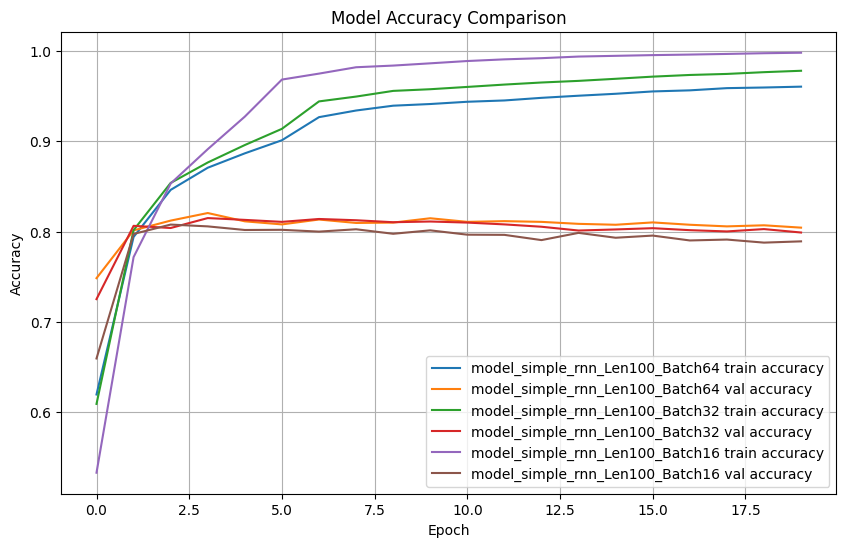

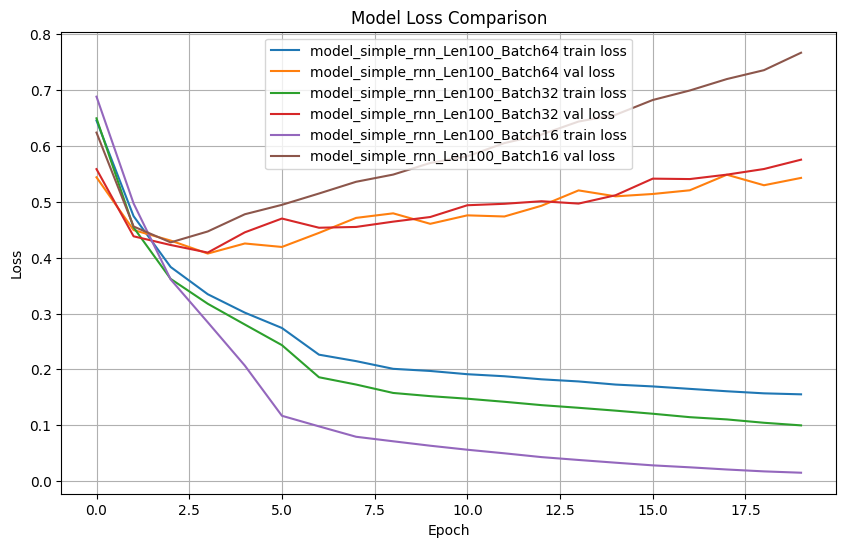

In [16]:
# Comparaison de simpleRNN utilisant différentes Batch size sous la même max_len
histories_1 = {
    'model_simple_rnn_Len100_Batch64': history_simple_rnn_Len100_Batch64,
    'model_simple_rnn_Len100_Batch32': history_simple_rnn_Len100_Batch32,
    'model_simple_rnn_Len100_Batch16': history_simple_rnn_Len100_Batch16,

}
plot_training_histories(histories_1, metric='accuracy')
plot_training_histories(histories_1, metric='loss')

#### 2.1.2 Nous fixerons la valeur de `batch size` et changerons la taille du `maxlen`

In [17]:
# Run simple_RNN max_len=500, batch size=32
model_simple_rnn_Len500_Batch32 = create_model('simple_RNN', embed_size=128, hidden_size=64)
history_simple_rnn_Len500_Batch32 = compile_and_train(model_simple_rnn_Len500_Batch32, x_train_len500, y_train, Batch_size=32, Epochs=20, model_type='simple_RNN')
evaluate_model(model_simple_rnn_Len500_Batch32, x_test_len500, y_test)
# plot_history(history_simple_rnn_Len500_Batch32)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ (None, None, 128)      │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 64)             │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 652,417 (2.49 MB)

 Trainable params: 652,417 (2.49 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.5090 - loss: 0.6962 - val_accuracy: 0.5668 - val_loss: 0.6823 - learning_rate: 1.0000e-04
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 36ms/step - accuracy: 0.6362 - loss: 0.6528 - val_accuracy: 0.7398 - val_loss: 0.5479 - learning_rate: 1.0000e-04
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 23s 37ms/step - accuracy: 0.8074 - loss: 0.4514 - val_accuracy: 0.8176 - val_loss: 0.4174 - learning_rate: 1.0000e-04
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.8675 - loss: 0.3357 - val_accuracy: 0.8366 - val_loss: 0.3809 - learning_rate: 1.0000e-04
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.9003 - loss: 0.2698 - val_accuracy: 0.8434 - val_loss: 0.3814 - learning_rate: 1.0000e-04
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/step - accuracy: 0.9258 - loss: 0.2054 - val_accuracy: 0.8610 - val_loss: 0.3464 - learning_rate: 1.0000e-04
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 24s 38ms/ste

In [18]:
# Run simple_RNN max_len=1000, batch size=32, hidden_size=64
model_simple_rnn_Len1000_Batch32 = create_model('simple_RNN', embed_size=128, hidden_size=64)
history_simple_rnn_Len1000_Batch32 = compile_and_train(model_simple_rnn_Len1000_Batch32, x_train_len1000, y_train, Batch_size=32, Epochs=20, model_type='simple_RNN')
evaluate_model(model_simple_rnn_Len1000_Batch32, x_test_len1000, y_test)
# plot_history(history_simple_rnn_Len1000_Batch32)

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ (None, None, 128)      │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_4 (SimpleRNN)        │ (None, 64)             │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 652,417 (2.49 MB)

 Trainable params: 652,417 (2.49 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.5370 - loss: 0.6866 - val_accuracy: 0.7266 - val_loss: 0.5564 - learning_rate: 1.0000e-04
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.7838 - loss: 0.4902 - val_accuracy: 0.8304 - val_loss: 0.4074 - learning_rate: 1.0000e-04
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.8641 - loss: 0.3514 - val_accuracy: 0.8566 - val_loss: 0.3524 - learning_rate: 1.0000e-04
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.8944 - loss: 0.2819 - val_accuracy: 0.8680 - val_loss: 0.3230 - learning_rate: 1.0000e-04
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.9144 - loss: 0.2395 - val_accuracy: 0.8644 - val_loss: 0.3594 - learning_rate: 1.0000e-04
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.9270 - loss: 0.2060 - val_accuracy: 0.8704 - val_loss: 0.3418 - learning_rate: 1.0000e-04
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/ste

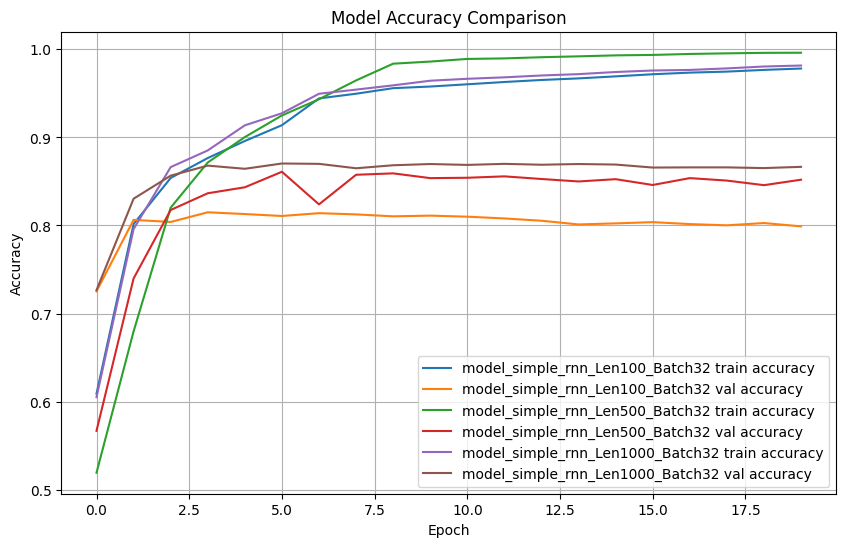

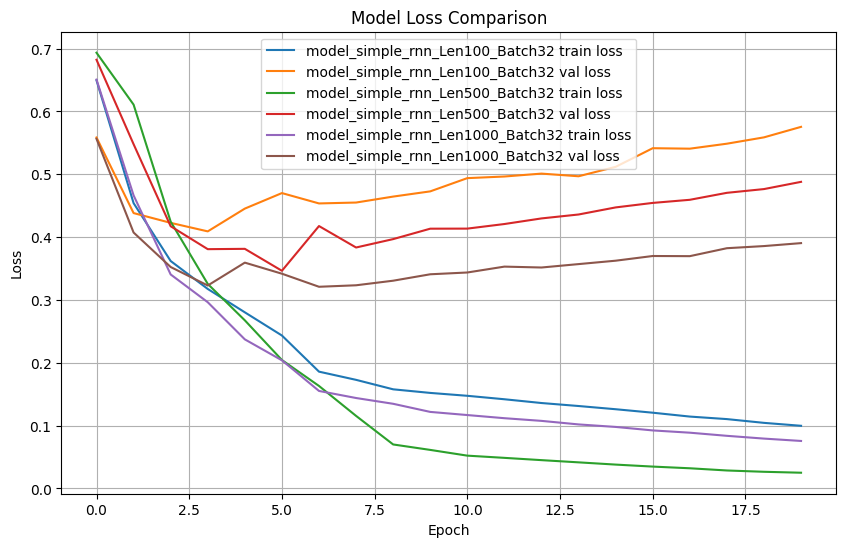

In [19]:
# Comparaison de simpleRNN utilisant différentes max_len sous la même Batch size
histories_2 = {
    'model_simple_rnn_Len100_Batch32': history_simple_rnn_Len100_Batch32,
    'model_simple_rnn_Len500_Batch32': history_simple_rnn_Len500_Batch32,
    'model_simple_rnn_Len1000_Batch32': history_simple_rnn_Len1000_Batch32,

}
plot_training_histories(histories_2, metric='accuracy')
plot_training_histories(histories_2, metric='loss')

#### 2.1.3 Nous fixerons la valeur de `batch size` et la taille du `maxlen`, changerons la taille du `RNN_size`

In [20]:
# Run simple_RNN max_len=500, batch size=32, hidden_size=16
model_simple_rnn_Len500_Batch32_hidden16 = create_model('simple_RNN', embed_size=128, hidden_size=16)
history_simple_rnn_Len500_Batch32_hidden16 = compile_and_train(model_simple_rnn_Len500_Batch32_hidden16, x_train_len500, y_train, Batch_size=32, Epochs=20, model_type='simple_RNN')
evaluate_model(model_simple_rnn_Len500_Batch32_hidden16, x_test_len500, y_test)
# plot_history(history_simple_rnn_Len1000_Batch32_hidden16)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (None, None, 128)      │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ (None, 16)             │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 642,337 (2.45 MB)

 Trainable params: 642,337 (2.45 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 25ms/step - accuracy: 0.5126 - loss: 0.6953 - val_accuracy: 0.5512 - val_loss: 0.6844 - learning_rate: 1.0000e-04
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.6235 - loss: 0.6607 - val_accuracy: 0.5748 - val_loss: 0.6738 - learning_rate: 1.0000e-04
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.7144 - loss: 0.6104 - val_accuracy: 0.5954 - val_loss: 0.6596 - learning_rate: 1.0000e-04
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.7820 - loss: 0.5498 - val_accuracy: 0.6054 - val_loss: 0.6524 - learning_rate: 1.0000e-04
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.8320 - loss: 0.4815 - val_accuracy: 0.6080 - val_loss: 0.6486 - learning_rate: 1.0000e-04
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.8722 - loss: 0.4152 - val_accuracy: 0.6124 - val_loss: 0.6582 - learning_rate: 1.0000e-04
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/ste

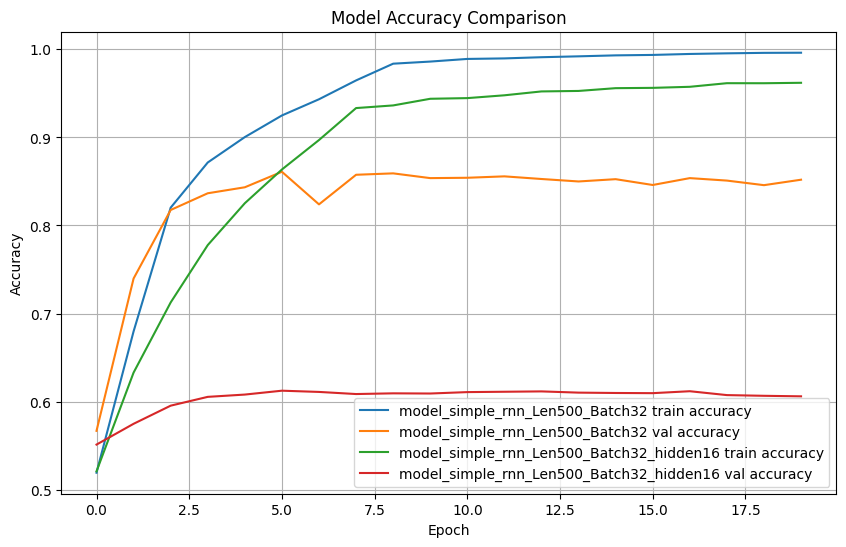

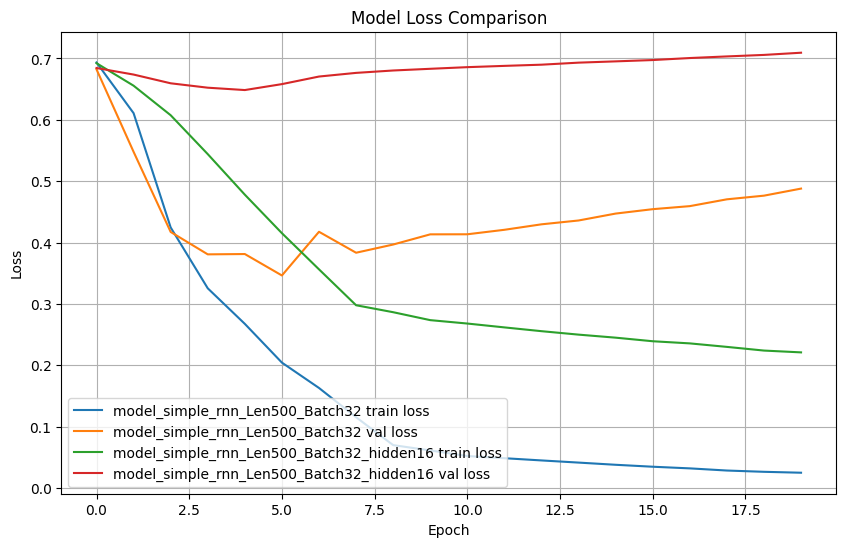

In [21]:
# Comparaison de simpleRNN utilisant différentes max_len sous la même Batch size
histories_3 = {
    'model_simple_rnn_Len500_Batch32': history_simple_rnn_Len500_Batch32,
    'model_simple_rnn_Len500_Batch32_hidden16': history_simple_rnn_Len500_Batch32_hidden16,


}
plot_training_histories(histories_3, metric='accuracy')
plot_training_histories(histories_3, metric='loss')

#### 2.1.4 Nous fixerons la valeur de `batch size`， la taille du `maxlen` et la taille du `RNN_size`，changerons la fonction d'activation

In [22]:
# Run simple_RNN max_len=500, batch size=32
model_simple_rnn_Len500_Batch32_MSE = create_model('simple_RNN', embed_size=128, hidden_size=64)
history_simple_rnn_Len500_Batch32_MSE = compile_and_train(model_simple_rnn_Len500_Batch32_MSE, x_train_len500, y_train, Batch_size=32, Epochs=20, model_type='simple_RNN', Loss='mse')
evaluate_model(model_simple_rnn_Len500_Batch32_MSE, x_test_len500, y_test)
# plot_history(history_simple_rnn_Len500_Batch32_MSE)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ (None, None, 128)      │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_6 (SimpleRNN)        │ (None, 64)             │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 652,417 (2.49 MB)

 Trainable params: 652,417 (2.49 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 17s 26ms/step - accuracy: 0.5860 - loss: 0.2335 - val_accuracy: 0.7082 - val_loss: 0.1919 - learning_rate: 1.0000e-04
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.8235 - loss: 0.1328 - val_accuracy: 0.8290 - val_loss: 0.1261 - learning_rate: 1.0000e-04
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.8739 - loss: 0.0967 - val_accuracy: 0.8590 - val_loss: 0.1060 - learning_rate: 1.0000e-04
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.8925 - loss: 0.0840 - val_accuracy: 0.8438 - val_loss: 0.1173 - learning_rate: 1.0000e-04
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.9046 - loss: 0.0756 - val_accuracy: 0.8682 - val_loss: 0.0992 - learning_rate: 1.0000e-04
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 25ms/step - accuracy: 0.9171 - loss: 0.0661 - val_accuracy: 0.8654 - val_loss: 0.0989 - learning_rate: 1.0000e-04
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 16s 26ms/ste

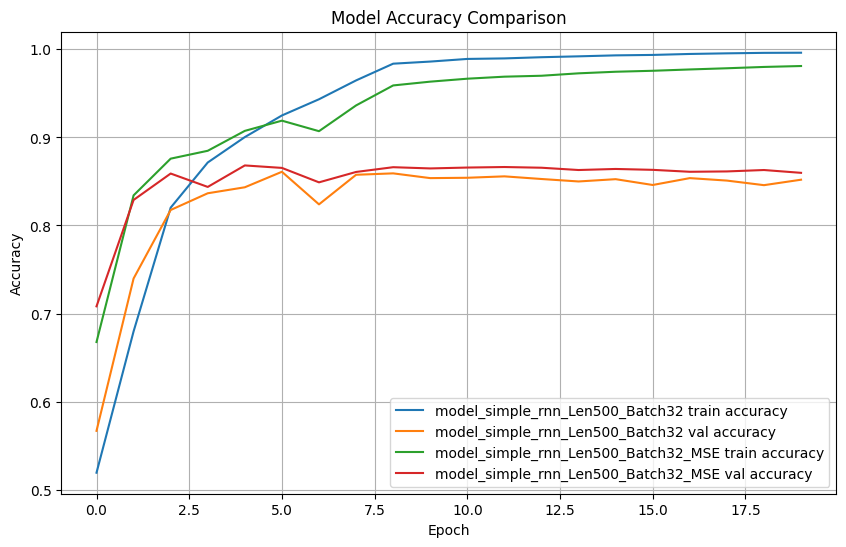

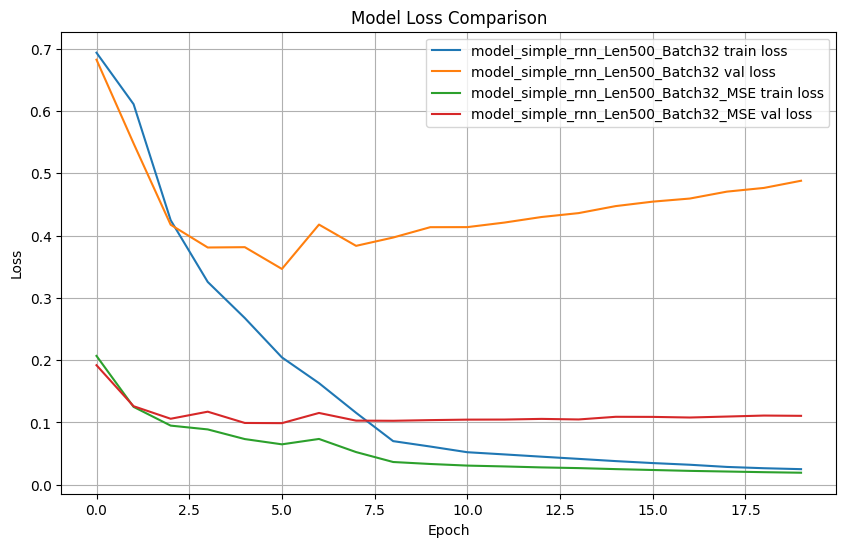

In [23]:
# Comparaison de simpleRNN utilisant différentes max_len sous la même Batch size
histories_4 = {
    'model_simple_rnn_Len500_Batch32': history_simple_rnn_Len500_Batch32,
    'model_simple_rnn_Len500_Batch32_MSE': history_simple_rnn_Len500_Batch32_MSE,


}
plot_training_histories(histories_4, metric='accuracy')
plot_training_histories(histories_4, metric='loss')

### 2.2 mono_LSTM 

#### 2.2.1 Nous fixerons la valeur de `maxlen` et changerons la taille du `batch size`

In [24]:
# Run mono_LSTM max_len=100, batch size=16
model_mono_LSTM_Len100_Batch16 = create_model('mono_LSTM', embed_size=128, hidden_size=64)
history_mono_LSTM_Len100_Batch16 = compile_and_train(model_mono_LSTM_Len100_Batch16, x_train_len100, y_train, Batch_size=16, Epochs=20, model_type='mono_LSTM')
evaluate_model(model_mono_LSTM_Len100_Batch16, x_test_len100, y_test)
# plot_history(history_mono_LSTM_Len100_Batch16)

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ (None, None, 128)      │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 689,473 (2.63 MB)

 Trainable params: 689,473 (2.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.6657 - loss: 0.6344 - val_accuracy: 0.7844 - val_loss: 0.4763 - learning_rate: 0.0010
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.8321 - loss: 0.4029 - val_accuracy: 0.8036 - val_loss: 0.4630 - learning_rate: 0.0010
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.8633 - loss: 0.3467 - val_accuracy: 0.8258 - val_loss: 0.4089 - learning_rate: 0.0010
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.8803 - loss: 0.3102 - val_accuracy: 0.8094 - val_loss: 0.4496 - learning_rate: 0.0010
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.9024 - loss: 0.2705 - val_accuracy: 0.8232 - val_loss: 0.4468 - learning_rate: 0.0010
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.9341 - loss: 0.1903 - val_accuracy: 0.8204 - val_loss: 0.5496 - learning_rate: 2.0000e-04
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - ac

In [25]:
# Run mono_LSTM max_len=100, batch size=32
model_mono_LSTM_Len100_Batch32 = create_model('mono_LSTM', embed_size=128, hidden_size=64)
history_mono_LSTM_Len100_Batch32 = compile_and_train(model_mono_LSTM_Len100_Batch32, x_train_len100, y_train, Batch_size=32, Epochs=20, model_type='mono_LSTM')
evaluate_model(model_mono_LSTM_Len100_Batch32, x_test_len100, y_test)
# plot_history(history_mono_LSTM_Len100_Batch32)

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ (None, None, 128)      │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 689,473 (2.63 MB)

 Trainable params: 689,473 (2.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.6291 - loss: 0.6572 - val_accuracy: 0.8094 - val_loss: 0.4334 - learning_rate: 0.0010
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.8425 - loss: 0.3820 - val_accuracy: 0.8200 - val_loss: 0.4173 - learning_rate: 0.0010
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.8647 - loss: 0.3440 - val_accuracy: 0.8154 - val_loss: 0.4168 - learning_rate: 0.0010
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.8881 - loss: 0.3007 - val_accuracy: 0.8180 - val_loss: 0.4453 - learning_rate: 0.0010
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.9067 - loss: 0.2577 - val_accuracy: 0.8162 - val_loss: 0.4717 - learning_rate: 0.0010
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.9357 - loss: 0.1861 - val_accuracy: 0.8142 - val_loss: 0.5387 - learning_rate: 2.0000e-04
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.9496 - loss

In [26]:
# Run mono_LSTM max_len=100, batch size=64
model_mono_LSTM_Len100_Batch64 = create_model('mono_LSTM', embed_size=128, hidden_size=64)
history_mono_LSTM_Len100_Batch64 = compile_and_train(model_mono_LSTM_Len100_Batch64, x_train_len100, y_train, Batch_size=64, Epochs=20, model_type='mono_LSTM')
evaluate_model(model_mono_LSTM_Len100_Batch64, x_test_len100, y_test)
# plot_history(history_mono_LSTM_Len100_Batch64)

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ (None, None, 128)      │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 689,473 (2.63 MB)

 Trainable params: 689,473 (2.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.6465 - loss: 0.6601 - val_accuracy: 0.8096 - val_loss: 0.4346 - learning_rate: 0.0010
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.8503 - loss: 0.3654 - val_accuracy: 0.8248 - val_loss: 0.4016 - learning_rate: 0.0010
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.8754 - loss: 0.3238 - val_accuracy: 0.8192 - val_loss: 0.4094 - learning_rate: 0.0010
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.8914 - loss: 0.2884 - val_accuracy: 0.8128 - val_loss: 0.4325 - learning_rate: 0.0010
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9193 - loss: 0.2220 - val_accuracy: 0.8182 - val_loss: 0.4795 - learning_rate: 2.0000e-04
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9339 - loss: 0.1912 - val_accuracy: 0.8136 - val_loss: 0.5130 - learning_rate: 2.0000e-04
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9414 - 

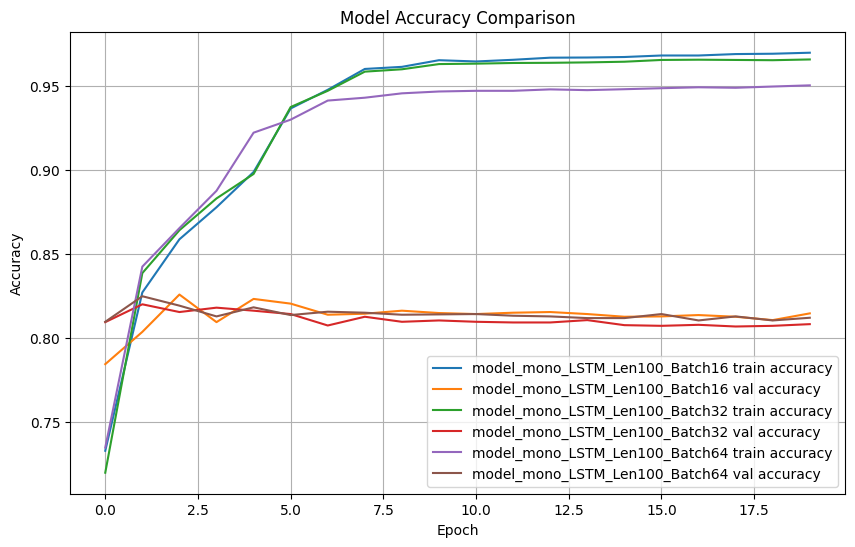

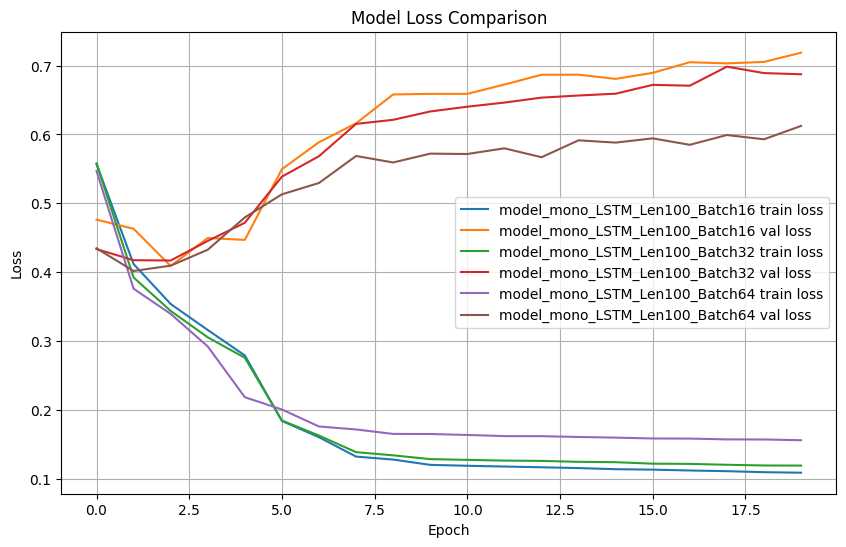

In [27]:
# Comparaison de mono_LSTM utilisant différentes Batch size sous la même max_len
histories_5 = {
    'model_mono_LSTM_Len100_Batch16': history_mono_LSTM_Len100_Batch16,
    'model_mono_LSTM_Len100_Batch32': history_mono_LSTM_Len100_Batch32,
    'model_mono_LSTM_Len100_Batch64': history_mono_LSTM_Len100_Batch64,

}
plot_training_histories(histories_5, metric='accuracy')
plot_training_histories(histories_5, metric='loss')

#### 2.2.2 Nous fixerons la valeur de `batch size` et changerons la taille du `maxlen`

In [28]:
# Run mono_LSTM max_len=500, batch size=64
model_mono_LSTM_Len500_Batch64 = create_model('mono_LSTM', embed_size=128, hidden_size=64)
history_mono_LSTM_Len500_Batch64 = compile_and_train(model_mono_LSTM_Len500_Batch64, x_train_len500, y_train, Batch_size=64, Epochs=20, model_type='mono_LSTM')
evaluate_model(model_mono_LSTM_Len500_Batch64, x_test_len500, y_test)
# plot_history(history_mono_LSTM_Len500_Batch64)

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)        │ (None, None, 128)      │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 689,473 (2.63 MB)

 Trainable params: 689,473 (2.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 103ms/step - accuracy: 0.6874 - loss: 0.6328 - val_accuracy: 0.8418 - val_loss: 0.3883 - learning_rate: 0.0010
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 102ms/step - accuracy: 0.8743 - loss: 0.3332 - val_accuracy: 0.8674 - val_loss: 0.3335 - learning_rate: 0.0010
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 102ms/step - accuracy: 0.8914 - loss: 0.2956 - val_accuracy: 0.8656 - val_loss: 0.3463 - learning_rate: 0.0010
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 102ms/step - accuracy: 0.9044 - loss: 0.2678 - val_accuracy: 0.8532 - val_loss: 0.3608 - learning_rate: 0.0010
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 102ms/step - accuracy: 0.9344 - loss: 0.1965 - val_accuracy: 0.8764 - val_loss: 0.3270 - learning_rate: 2.0000e-04
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 101ms/step - accuracy: 0.9452 - loss: 0.1633 - val_accuracy: 0.8692 - val_loss: 0.3221 - learning_rate: 2.0000e-04
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 101ms/step - accur

In [29]:
# Run mono_LSTM max_len=1000, batch size=32
model_mono_LSTM_Len1000_Batch64 = create_model('mono_LSTM', embed_size=128, hidden_size=64)
history_mono_LSTM_Len1000_Batch64 = compile_and_train(model_mono_LSTM_Len1000_Batch64, x_train_len1000, y_train, Batch_size=64, Epochs=20, model_type='mono_LSTM')
evaluate_model(model_mono_LSTM_Len1000_Batch64, x_test_len1000, y_test)
# plot_history(history_mono_LSTM_Len1000_Batch64)

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_11 (Embedding)        │ (None, None, 128)      │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 689,473 (2.63 MB)

 Trainable params: 689,473 (2.63 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 72s 228ms/step - accuracy: 0.7036 - loss: 0.6176 - val_accuracy: 0.8182 - val_loss: 0.4199 - learning_rate: 0.0010
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 73s 234ms/step - accuracy: 0.8769 - loss: 0.3161 - val_accuracy: 0.8796 - val_loss: 0.2987 - learning_rate: 0.0010
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 71s 228ms/step - accuracy: 0.9087 - loss: 0.2485 - val_accuracy: 0.8750 - val_loss: 0.3056 - learning_rate: 0.0010
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 71s 226ms/step - accuracy: 0.9111 - loss: 0.2397 - val_accuracy: 0.8740 - val_loss: 0.3226 - learning_rate: 0.0010
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 71s 228ms/step - accuracy: 0.9475 - loss: 0.1619 - val_accuracy: 0.8756 - val_loss: 0.3385 - learning_rate: 2.0000e-04
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 73s 233ms/step - accuracy: 0.9539 - loss: 0.1422 - val_accuracy: 0.8752 - val_loss: 0.3416 - learning_rate: 2.0000e-04
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 73s 232ms/step - accur

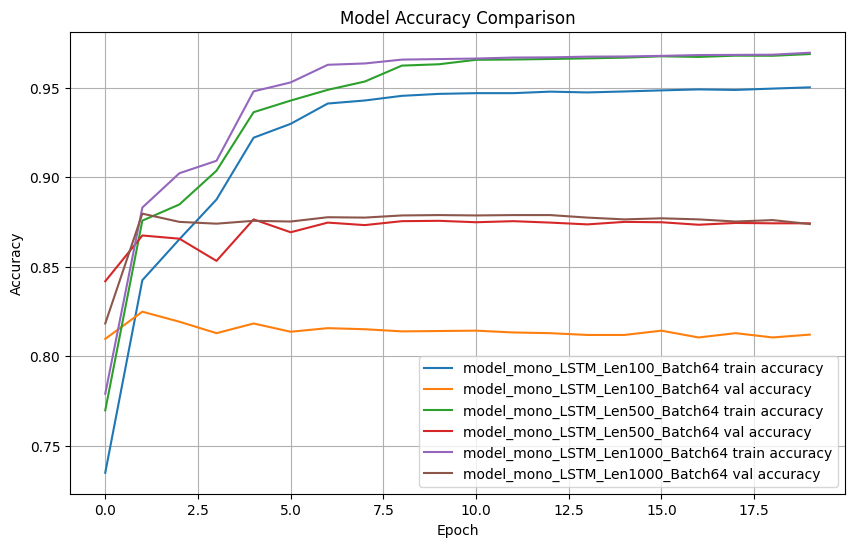

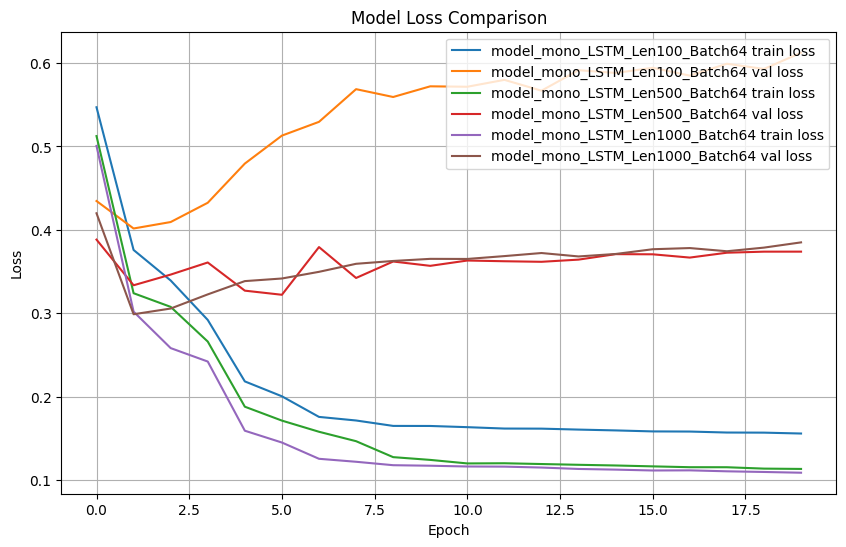

In [30]:
# Comparaison de simpleRNN utilisant différentes max_len sous la même Batch size
histories_6 = {
    'model_mono_LSTM_Len100_Batch64': history_mono_LSTM_Len100_Batch64,
    'model_mono_LSTM_Len500_Batch64': history_mono_LSTM_Len500_Batch64,
    'model_mono_LSTM_Len1000_Batch64': history_mono_LSTM_Len1000_Batch64,

}
plot_training_histories(histories_6, metric='accuracy')
plot_training_histories(histories_6, metric='loss')

### 2.3 bi_LSTM 

#### 2.3.1 Nous fixerons la valeur de `maxlen` et changerons la taille du `batch size`

In [31]:
# Run bi_LSTM max_len=500, batch size=16
model_bi_LSTM_Len500_Batch16 = create_model('bi_LSTM', embed_size=128, hidden_size=64)
history_bi_LSTM_Len500_Batch16 = compile_and_train(model_bi_LSTM_Len500_Batch16, x_train_len500, y_train, Batch_size=16, Epochs=20, model_type='bi_LSTM')
evaluate_model(model_bi_LSTM_Len500_Batch16, x_test_len500, y_test)
# plot_history(history_bi_LSTM_Len500_Batch16)

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_12 (Embedding)        │ (None, None, 128)      │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 738,945 (2.82 MB)

 Trainable params: 738,945 (2.82 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 87s 68ms/step - accuracy: 0.7051 - loss: 0.5500 - val_accuracy: 0.7614 - val_loss: 0.4898 - learning_rate: 0.0010
Epoch 2/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 64ms/step - accuracy: 0.8247 - loss: 0.3976 - val_accuracy: 0.8260 - val_loss: 0.3941 - learning_rate: 0.0010
Epoch 3/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 79s 64ms/step - accuracy: 0.8834 - loss: 0.2865 - val_accuracy: 0.8780 - val_loss: 0.3019 - learning_rate: 0.0010
Epoch 4/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 64ms/step - accuracy: 0.9287 - loss: 0.1986 - val_accuracy: 0.8750 - val_loss: 0.3127 - learning_rate: 0.0010
Epoch 5/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 64ms/step - accuracy: 0.9450 - loss: 0.1491 - val_accuracy: 0.8778 - val_loss: 0.3401 - learning_rate: 0.0010
Epoch 6/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 64ms/step - accuracy: 0.9707 - loss: 0.0930 - val_accuracy: 0.8814 - val_loss: 0.3800 - learning_rate: 2.0000e-04
Epoch 7/20
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 64ms/step - ac

In [32]:
# Run bi_LSTM max_len=500, batch size=32
model_bi_LSTM_Len500_Batch32 = create_model('bi_LSTM', embed_size=128, hidden_size=64)
history_bi_LSTM_Len500_Batch32 = compile_and_train(model_bi_LSTM_Len500_Batch32, x_train_len500, y_train, Batch_size=32, Epochs=20, model_type='bi_LSTM')
evaluate_model(model_bi_LSTM_Len500_Batch32, x_test_len500, y_test)
# plot_history(history_bi_LSTM_Len500_Batch32)

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_13 (Embedding)        │ (None, None, 128)      │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 738,945 (2.82 MB)

 Trainable params: 738,945 (2.82 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 66ms/step - accuracy: 0.6853 - loss: 0.5595 - val_accuracy: 0.8400 - val_loss: 0.3770 - learning_rate: 0.0010
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.8488 - loss: 0.3623 - val_accuracy: 0.8656 - val_loss: 0.3227 - learning_rate: 0.0010
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 68ms/step - accuracy: 0.8978 - loss: 0.2632 - val_accuracy: 0.8646 - val_loss: 0.3147 - learning_rate: 0.0010
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 68ms/step - accuracy: 0.9253 - loss: 0.2013 - val_accuracy: 0.8718 - val_loss: 0.3204 - learning_rate: 0.0010
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 68ms/step - accuracy: 0.9259 - loss: 0.1929 - val_accuracy: 0.8562 - val_loss: 0.3769 - learning_rate: 0.0010
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.9573 - loss: 0.1194 - val_accuracy: 0.8646 - val_loss: 0.3647 - learning_rate: 2.0000e-04
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 42s 67ms/step - accuracy: 0.9694

In [33]:
# Run bi_LSTM max_len=500, batch size=64
model_bi_LSTM_Len500_Batch64 = create_model('bi_LSTM', embed_size=128, hidden_size=64)
history_bi_LSTM_Len500_Batch64 = compile_and_train(model_bi_LSTM_Len500_Batch64, x_train_len500, y_train, Batch_size=64, Epochs=20, model_type='bi_LSTM')
evaluate_model(model_bi_LSTM_Len500_Batch64, x_test_len500, y_test)
# plot_history(history_bi_LSTM_Len500_Batch64)

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_14 (Embedding)        │ (None, None, 128)      │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 738,945 (2.82 MB)

 Trainable params: 738,945 (2.82 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 63s 196ms/step - accuracy: 0.6821 - loss: 0.5745 - val_accuracy: 0.8292 - val_loss: 0.3933 - learning_rate: 0.0010
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 62s 198ms/step - accuracy: 0.8781 - loss: 0.3120 - val_accuracy: 0.8474 - val_loss: 0.3892 - learning_rate: 0.0010
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 62s 197ms/step - accuracy: 0.8630 - loss: 0.3180 - val_accuracy: 0.6826 - val_loss: 0.5687 - learning_rate: 0.0010
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 62s 197ms/step - accuracy: 0.8437 - loss: 0.3563 - val_accuracy: 0.8680 - val_loss: 0.3637 - learning_rate: 0.0010
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 62s 198ms/step - accuracy: 0.9218 - loss: 0.2066 - val_accuracy: 0.7850 - val_loss: 0.4506 - learning_rate: 0.0010
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 62s 198ms/step - accuracy: 0.9122 - loss: 0.2345 - val_accuracy: 0.8694 - val_loss: 0.3384 - learning_rate: 0.0010
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 62s 198ms/step - accuracy: 0.9

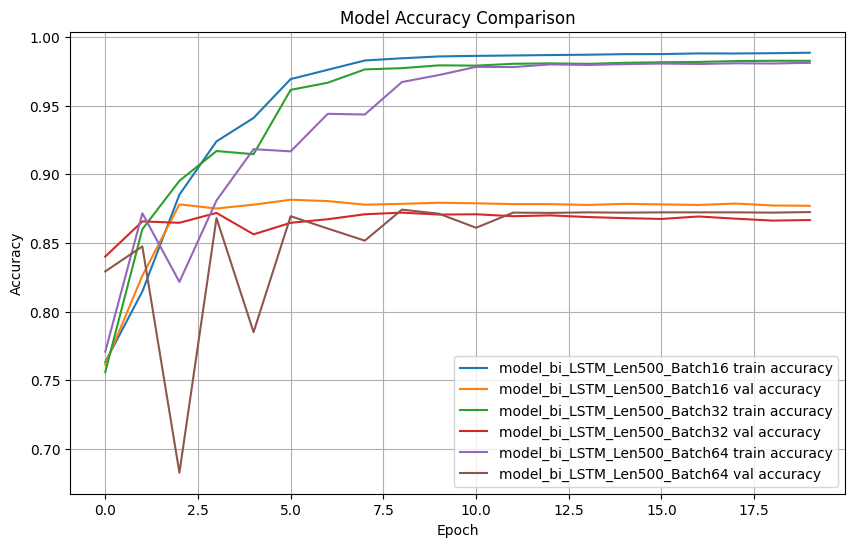

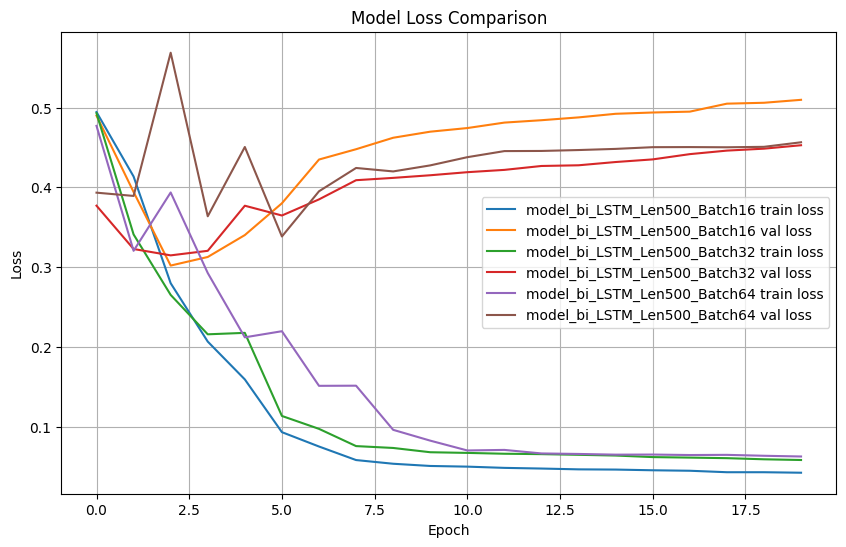

In [34]:
# Comparaison de simpleRNN utilisant différentes max_len sous la même Batch size
histories_7 = {
    'model_bi_LSTM_Len500_Batch16': history_bi_LSTM_Len500_Batch16,
    'model_bi_LSTM_Len500_Batch32': history_bi_LSTM_Len500_Batch32,
    'model_bi_LSTM_Len500_Batch64': history_bi_LSTM_Len500_Batch64,

}
plot_training_histories(histories_7, metric='accuracy')
plot_training_histories(histories_7, metric='loss')

#### 2.3.2 Change max_len

In [35]:
# Run bi_LSTM max_len=100, batch size=32
model_bi_LSTM_Len100_Batch32 = create_model('bi_LSTM', embed_size=128, hidden_size=64)
history_bi_LSTM_Len100_Batch32 = compile_and_train(model_bi_LSTM_Len100_Batch32, x_train_len100, y_train, Batch_size=32, Epochs=20, model_type='bi_LSTM')
evaluate_model(model_bi_LSTM_Len100_Batch32, x_test_len100, y_test)
# plot_history(history_bi_LSTM_Len500_Batch32)

Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_15 (Embedding)        │ (None, None, 128)      │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 738,945 (2.82 MB)

 Trainable params: 738,945 (2.82 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.6644 - loss: 0.5919 - val_accuracy: 0.8124 - val_loss: 0.4332 - learning_rate: 0.0010
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.8518 - loss: 0.3544 - val_accuracy: 0.8076 - val_loss: 0.4512 - learning_rate: 0.0010
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.8866 - loss: 0.2728 - val_accuracy: 0.8100 - val_loss: 0.4395 - learning_rate: 0.0010
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9408 - loss: 0.1640 - val_accuracy: 0.8224 - val_loss: 0.5225 - learning_rate: 2.0000e-04
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9615 - loss: 0.1150 - val_accuracy: 0.8096 - val_loss: 0.5754 - learning_rate: 2.0000e-04
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.9735 - loss: 0.0858 - val_accuracy: 0.8114 - val_loss: 0.6220 - learning_rate: 4.0000e-05
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 9s 14ms/step - accuracy: 0.97

In [36]:
# Run bi_LSTM max_len=1000, batch size=32
model_bi_LSTM_Len1000_Batch32 = create_model('bi_LSTM', embed_size=128, hidden_size=64)
history_bi_LSTM_Len1000_Batch32 = compile_and_train(model_bi_LSTM_Len1000_Batch32, x_train_len1000, y_train, Batch_size=32, Epochs=20, model_type='bi_LSTM')
evaluate_model(model_bi_LSTM_Len1000_Batch32, x_test_len100, y_test)
# plot_history(history_bi_LSTM_Len1000_Batch32)

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_16 (Embedding)        │ (None, None, 128)      │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 738,945 (2.82 MB)

 Trainable params: 738,945 (2.82 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 119s 188ms/step - accuracy: 0.6792 - loss: 0.5784 - val_accuracy: 0.7548 - val_loss: 0.5045 - learning_rate: 0.0010
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 115s 184ms/step - accuracy: 0.8423 - loss: 0.3806 - val_accuracy: 0.7954 - val_loss: 0.5719 - learning_rate: 0.0010
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 116s 185ms/step - accuracy: 0.8564 - loss: 0.3688 - val_accuracy: 0.7782 - val_loss: 0.4707 - learning_rate: 0.0010
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 122s 195ms/step - accuracy: 0.8265 - loss: 0.3863 - val_accuracy: 0.8506 - val_loss: 0.3484 - learning_rate: 0.0010
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 118s 189ms/step - accuracy: 0.8936 - loss: 0.2642 - val_accuracy: 0.8580 - val_loss: 0.3308 - learning_rate: 0.0010
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 115s 184ms/step - accuracy: 0.8312 - loss: 0.3834 - val_accuracy: 0.8622 - val_loss: 0.3529 - learning_rate: 0.0010
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 118s 188ms/step - accura

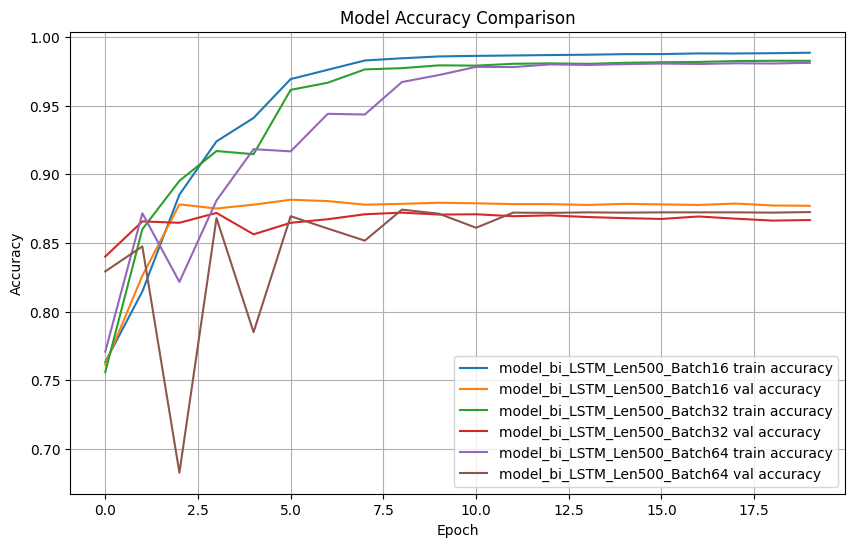

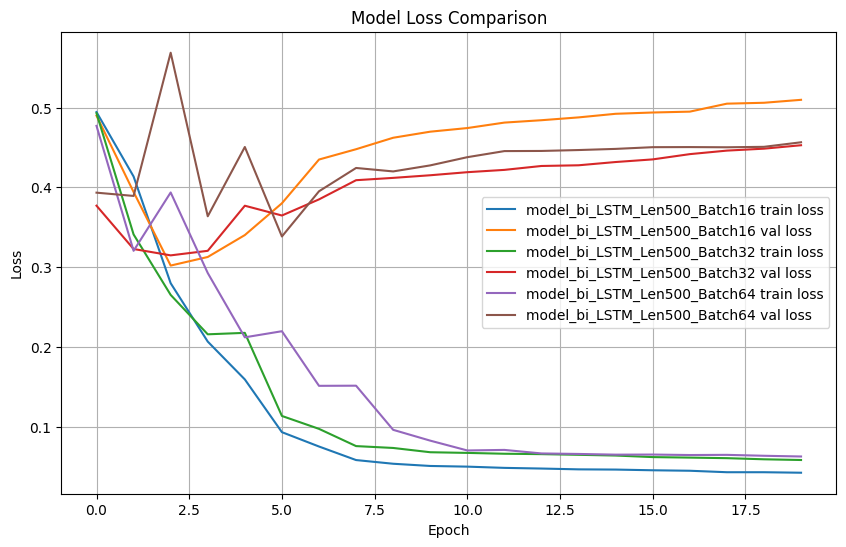

In [37]:
histories_8 = {
    'model_bi_LSTM_Len100_Batch32': history_bi_LSTM_Len100_Batch32,
    'model_bi_LSTM_Len500_Batch32': history_bi_LSTM_Len500_Batch32,
    'model_bi_LSTM_Len1000_Batch32': history_bi_LSTM_Len1000_Batch32,

}
plot_training_histories(histories_7, metric='accuracy')
plot_training_histories(histories_7, metric='loss')

#### 2.3.3 Change Hidden Units

In [38]:
# Run bi_LSTM max_len=500, batch size=32
model_bi_LSTM_Len500_Batch32_hidden16 = create_model('bi_LSTM', embed_size=128, hidden_size=16)
history_bi_LSTM_Len500_Batch32_hidden16 = compile_and_train(model_bi_LSTM_Len500_Batch32_hidden16, x_train_len500, y_train, Batch_size=32, Epochs=20, model_type='bi_LSTM')
evaluate_model(model_bi_LSTM_Len500_Batch32_hidden16, x_test_len500, y_test)
# plot_history(history_bi_LSTM_Len500_Batch32_hidden16)

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_17 (Embedding)        │ (None, None, 128)      │       640,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ (None, 32)             │        18,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 658,593 (2.51 MB)

 Trainable params: 658,593 (2.51 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 53ms/step - accuracy: 0.6952 - loss: 0.5666 - val_accuracy: 0.8230 - val_loss: 0.4103 - learning_rate: 0.0010
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 31s 50ms/step - accuracy: 0.8626 - loss: 0.3539 - val_accuracy: 0.8584 - val_loss: 0.3277 - learning_rate: 0.0010
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 54ms/step - accuracy: 0.9022 - loss: 0.2653 - val_accuracy: 0.8618 - val_loss: 0.3298 - learning_rate: 0.0010
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 54ms/step - accuracy: 0.9184 - loss: 0.2256 - val_accuracy: 0.8786 - val_loss: 0.3207 - learning_rate: 0.0010
Epoch 5/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 54ms/step - accuracy: 0.9336 - loss: 0.1939 - val_accuracy: 0.8506 - val_loss: 0.4434 - learning_rate: 0.0010
Epoch 6/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 55ms/step - accuracy: 0.9447 - loss: 0.1634 - val_accuracy: 0.8708 - val_loss: 0.4050 - learning_rate: 0.0010
Epoch 7/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 34s 55ms/step - accuracy: 0.9611 - l

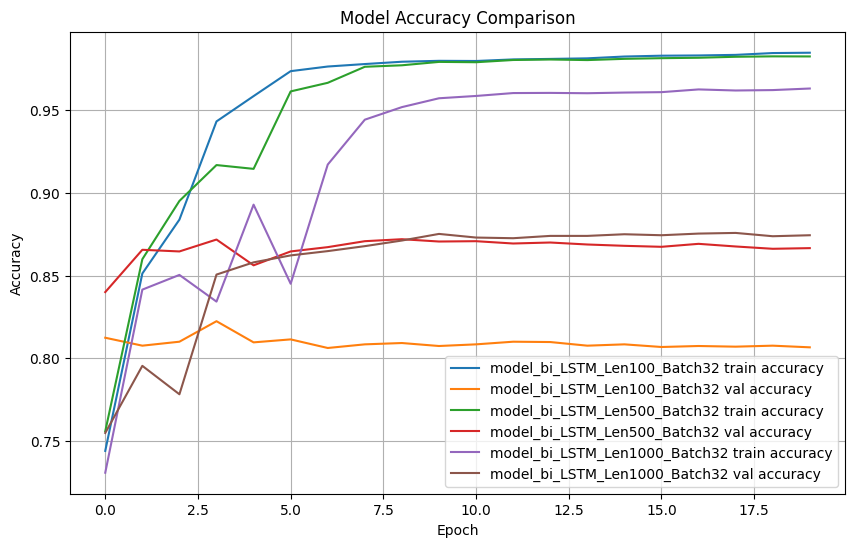

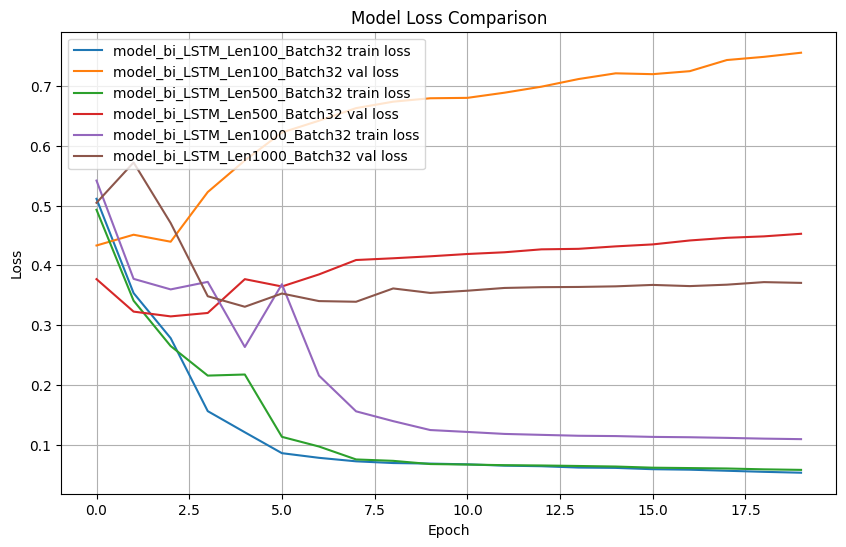

In [39]:
# Comparaison de simpleRNN utilisant différentes max_len sous la même Batch size
histories_9 = {
    'model_bi_LSTM_Len500_Batch32': history_bi_LSTM_Len500_Batch32,
    'model_bi_LSTM_Len500_Batch32_hidden16': history_bi_LSTM_Len500_Batch32_hidden16,

}
plot_training_histories(histories_8, metric='accuracy')
plot_training_histories(histories_8, metric='loss')

### 2.4 multi_Layer_LSTM

#### 2.4.1 Change max_len

In [40]:
# Run multi_LSTM max_len=100, batch size=32
model_multi_layer_LSTM_Len100= create_model('multi_layer_LSTM', embed_size=256, hidden_size=64, num_words=5000)
history_multi_layer_LSTM_Len100 = compile_and_train(model_multi_layer_LSTM_Len100, x_train_len100, y_train, Batch_size=64, Epochs=20, model_type='multi_layer_LSTM')
evaluate_model(model_multi_layer_LSTM_Len100, x_test_len100, y_test)
# plot_history(history_multi_layer_LSTM_Len100)

Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_18 (Embedding)        │ (None, None, 256)      │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, None, 32)       │        24,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, None, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, None, 64)       │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, None, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_6 (Bidirectional) │ (None, 128)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,376,993 (5.25 MB)

 Trainable params: 1,376,993 (5.25 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.5258 - loss: 0.6924 - val_accuracy: 0.6140 - val_loss: 0.6814 - learning_rate: 1.0000e-04
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.6513 - loss: 0.6434 - val_accuracy: 0.7710 - val_loss: 0.4784 - learning_rate: 1.0000e-04
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8053 - loss: 0.4246 - val_accuracy: 0.8030 - val_loss: 0.4318 - learning_rate: 1.0000e-04
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8481 - loss: 0.3491 - val_accuracy: 0.8208 - val_loss: 0.3984 - learning_rate: 1.0000e-04
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8760 - loss: 0.2971 - val_accuracy: 0.8198 - val_loss: 0.4071 - learning_rate: 1.0000e-04
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8972 - loss: 0.2565 - val_accuracy: 0.8210 - val_loss: 0.4157 - learning_rate: 1.0000e-04
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - acc

In [41]:
# Run multi_LSTM max_len=500
model_multi_layer_LSTM_Len500= create_model('multi_layer_LSTM', embed_size=256, hidden_size=64, num_words=5000)
history_multi_layer_LSTM_Len500 = compile_and_train(model_multi_layer_LSTM_Len500, x_train_len500, y_train, Batch_size=64, Epochs=20, model_type='multi_layer_LSTM')
evaluate_model(model_multi_layer_LSTM_Len500, x_test_len500, y_test)
# plot_history(history_multi_layer_LSTM_Len500)

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_19 (Embedding)        │ (None, None, 256)      │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, None, 32)       │        24,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, None, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, None, 64)       │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, None, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_7 (Bidirectional) │ (None, 128)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,376,993 (5.25 MB)

 Trainable params: 1,376,993 (5.25 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 18s 54ms/step - accuracy: 0.5246 - loss: 0.6925 - val_accuracy: 0.6194 - val_loss: 0.6857 - learning_rate: 1.0000e-04
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - accuracy: 0.6746 - loss: 0.6341 - val_accuracy: 0.7396 - val_loss: 0.5483 - learning_rate: 1.0000e-04
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - accuracy: 0.8251 - loss: 0.4265 - val_accuracy: 0.8552 - val_loss: 0.3540 - learning_rate: 1.0000e-04
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - accuracy: 0.8746 - loss: 0.3177 - val_accuracy: 0.8388 - val_loss: 0.3755 - learning_rate: 1.0000e-04
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - accuracy: 0.8935 - loss: 0.2734 - val_accuracy: 0.8734 - val_loss: 0.3106 - learning_rate: 1.0000e-04
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/step - accuracy: 0.9140 - loss: 0.2318 - val_accuracy: 0.8796 - val_loss: 0.2925 - learning_rate: 1.0000e-04
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 16s 52ms/ste

In [42]:
# Run multi_LSTM max_len=1000
model_multi_layer_LSTM_Len1000= create_model('multi_layer_LSTM', embed_size=256, hidden_size=64, num_words=5000)
history_multi_layer_LSTM_Len1000 = compile_and_train(model_multi_layer_LSTM_Len1000, x_train_len1000, y_train, Batch_size=64, Epochs=20, model_type='multi_layer_LSTM')
evaluate_model(model_multi_layer_LSTM_Len1000, x_test_len500, y_test)
# plot_history(history_multi_layer_LSTM_Len1000)

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_20 (Embedding)        │ (None, None, 256)      │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, None, 32)       │        24,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, None, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, None, 64)       │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, None, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_8 (Bidirectional) │ (None, 128)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,376,993 (5.25 MB)

 Trainable params: 1,376,993 (5.25 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 35s 108ms/step - accuracy: 0.5093 - loss: 0.6930 - val_accuracy: 0.6126 - val_loss: 0.6886 - learning_rate: 1.0000e-04
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 107ms/step - accuracy: 0.6471 - loss: 0.6566 - val_accuracy: 0.8166 - val_loss: 0.4734 - learning_rate: 1.0000e-04
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 34s 107ms/step - accuracy: 0.8162 - loss: 0.4389 - val_accuracy: 0.8568 - val_loss: 0.3520 - learning_rate: 1.0000e-04
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 34s 109ms/step - accuracy: 0.8704 - loss: 0.3250 - val_accuracy: 0.8580 - val_loss: 0.3410 - learning_rate: 1.0000e-04
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 34s 108ms/step - accuracy: 0.8964 - loss: 0.2699 - val_accuracy: 0.8726 - val_loss: 0.3067 - learning_rate: 1.0000e-04
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 34s 108ms/step - accuracy: 0.9107 - loss: 0.2406 - val_accuracy: 0.8752 - val_loss: 0.2928 - learning_rate: 1.0000e-04
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 34s 10

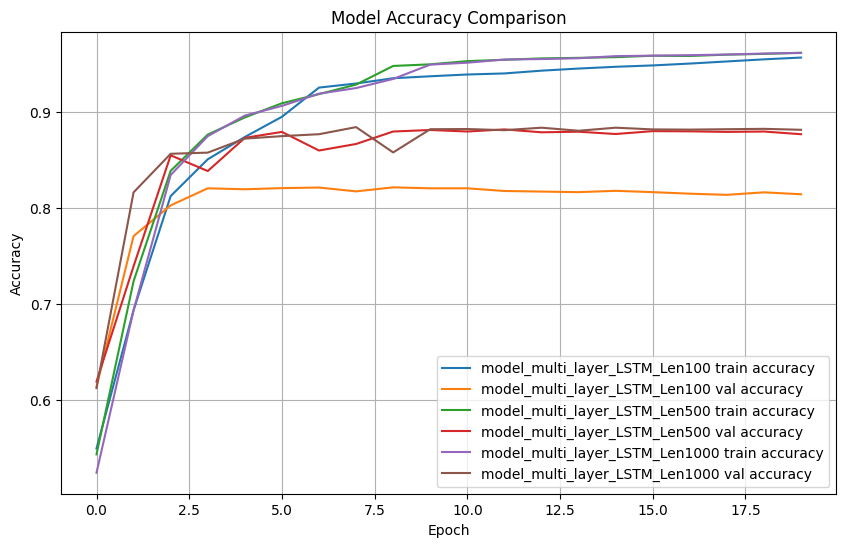

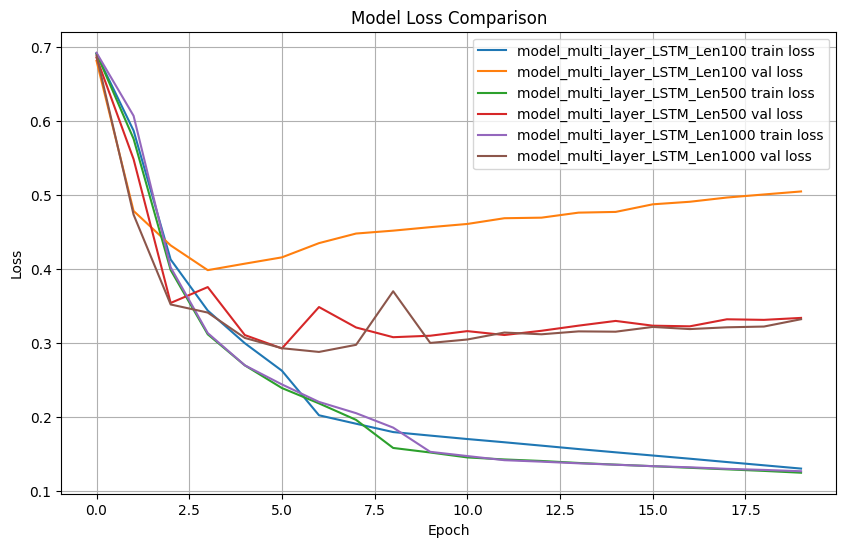

In [43]:
histories_10 = {
    'model_multi_layer_LSTM_Len100': history_multi_layer_LSTM_Len100,
    'model_multi_layer_LSTM_Len500': history_multi_layer_LSTM_Len500,
    'model_multi_layer_LSTM_Len1000': history_multi_layer_LSTM_Len1000,

}
plot_training_histories(histories_10, metric='accuracy')
plot_training_histories(histories_10, metric='loss')